## Calculate SR and average growth rate (ADG) of shrimp per cultivation cycle


### 1. **Calculate SR (Survival Rate)**
   This refers to determining the percentage of organisms that survive throughout a specific period, often compared to the initial population size.

### 2. **Calculate ADG (Average Daily Gain)**
   This involves computing the average weight gained per day over a certain period, commonly used to measure the growth rate of animals.

### 3. **Create Dataset for Modeling**
   Creating a dataset for modeling involves structuring the data in a way that includes relevant input features and corresponding target variables to predict various aspects of shrimp farming, such as Survival Rate (SR), biomass, Average Body Weight of Shrimp (ABW), and Revenue. The dataset may include parameters such as water quality indicators, feeding regimes, environmental conditions, and management practices as input features, while the target variables could be SR, biomass, ABW, and Revenue.

   The dataset would ideally comprise historical data collected over various cultivation cycles, encompassing a range of conditions and practices. Each entry in the dataset would represent a specific cultivation cycle, with features such as water temperature, pH levels, dissolved oxygen, feed composition, feed conversion ratio, stocking density, and management interventions. The corresponding target variables would be the observed SR, biomass, ABW, and Revenue at the end of each cycle.

   This structured dataset can then be utilized to train machine learning models to predict these key performance indicators (KPIs) based on the input features, facilitating better decision-making and optimization of shrimp farming practices.practices.

## Survival Rate

In [270]:
# Import pandas for data manipulation
import pandas as pd  
# Import numpy for numerical computations
import numpy as np  
# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt  
# Import seaborn for enhanced visualization
import seaborn as sns  

In [271]:
# Load the data from CSV files
farms_df = pd.read_csv('Data/farms.csv')
ponds_df = pd.read_csv('Data/ponds.csv')
cycles_df = pd.read_csv('Data/cycles.csv')
feeds_df = pd.read_csv('Data/feeds.csv')
fasting_df = pd.read_csv('Data/fasting.csv')
harvests_df = pd.read_csv('Data/harvests.csv')
sampling_df = pd.read_csv('Data/samplings.csv')
measurements_df = pd.read_csv('Data/measurements.csv')
feed_tray_df = pd.read_csv('Data/feed_tray.csv')
mortalities_df = pd.read_csv('Data/mortalities.csv')

In [272]:
cycles_df

,id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth
0,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,2024-04-12 17:02:22.000,Free,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.00,62.00,1.0
1,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,net,CV Raja Benur,A1,30.00,20.00,1.0
2,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,...,2024-04-12 17:02:22.000,Free,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.00,40.00,1.4
3,17743,20914,1.0,168275,2022-07-19 00:00:00.000,2022-09-29 00:00:00.000,#SiklusCustomerPermadi,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,...,2024-04-12 17:02:22.000,Free,NaN,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.00,28.00,1.5
4,17125,34187,1.0,188000,2022-07-07 00:00:00.000,2022-09-20 00:00:00.000,#SiklusTebar,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.0,...,2024-04-12 17:02:22.000,Free,2022-07-12 00:24:30.000,35.0,net,PT Windu Alam Sentosa,A,35.00,35.00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,19131,34712,2.0,300000,2022-10-25 00:00:00.000,2023-01-21 00:00:00.000,NaN,2022-10-25 10:13:31.000,2023-01-25 08:01:19.000,4999.9,...,2024-04-12 17:02:22.000,Free,NaN,1020.0,actual,MATERNIDADE NACALA,E01,70.71,70.71,1.5
2613,27552,45697,1.0,100000,2023-11-05 00:00:00.000,2024-02-13 00:00:00.000,#TBR03,2023-11-18 03:43:40.000,2024-03-27 02:52:36.000,900.0,...,2024-04-12 17:02:22.000,Free,2023-11-18 03:43:40.000,1022.0,net,Windu Segara Anyar,Kolam 4,45.00,20.00,1.5
2614,27885,24570,1.0,30716,2023-12-02 00:00:00.000,2024-02-29 00:00:00.000,#TBR05,2023-12-03 03:06:01.000,2024-03-03 03:03:26.000,86.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,gross,CV Raja Benur,Bagus,10.71,8.03,1.0
2615,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,2024-04-12 17:02:22.000,Free,2022-05-08 16:02:51.000,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.00,35.00,2.0


In [273]:
harvests_df

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
0,15013.0,2022-07-18 08:42:59,399.86,2022-07-18 08:42:59,0.01,11960.0,2022-04-17,Failed,NaN
1,11848.0,2021-10-25 23:29:53,300.00,2021-10-24 08:38:53,46.00,7520.0,2021-10-22,Full,1610000.0
2,11848.0,2021-10-25 23:29:35,300.00,2021-10-25 23:29:35,10.00,7546.0,2021-10-21,Partial,350000.0
3,4666.0,2020-10-08 02:07:18,110.00,2020-10-08 02:07:18,270.50,3009.0,2020-08-31,Failed,NaN
4,4666.0,2020-10-08 02:07:37,190.00,2020-10-08 02:07:37,270.50,3010.0,2020-08-31,Failed,NaN
...,...,...,...,...,...,...,...,...,...
8082,28500.0,2024-03-17 06:34:46,90.00,2024-03-14 05:43:03,12.00,27731.0,2024-03-05,Full,720000.0
8083,28500.0,2024-03-17 06:31:41,150.00,2024-03-14 05:47:06,4.00,27732.0,2024-02-02,Partial,280000.0
8084,11741.0,2022-10-06 05:23:38,80.00,2021-11-22 05:44:13,183.00,8252.0,2021-11-20,Full,10431000.0
8085,11741.0,2022-10-06 05:23:39,80.00,2021-11-22 05:55:49,30.00,8254.0,2021-11-20,Partial,1200000.0


## Merge cycles and harvests DataFrames

In [274]:
cycles_df = cycles_df.copy().drop_duplicates()
harvests_df = harvests_df.copy().drop_duplicates()

In [275]:
cycles_df

,id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth
0,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,2024-04-12 17:02:22.000,Free,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.00,62.00,1.0
1,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,net,CV Raja Benur,A1,30.00,20.00,1.0
2,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,...,2024-04-12 17:02:22.000,Free,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.00,40.00,1.4
3,17743,20914,1.0,168275,2022-07-19 00:00:00.000,2022-09-29 00:00:00.000,#SiklusCustomerPermadi,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,...,2024-04-12 17:02:22.000,Free,NaN,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.00,28.00,1.5
4,17125,34187,1.0,188000,2022-07-07 00:00:00.000,2022-09-20 00:00:00.000,#SiklusTebar,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.0,...,2024-04-12 17:02:22.000,Free,2022-07-12 00:24:30.000,35.0,net,PT Windu Alam Sentosa,A,35.00,35.00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,19131,34712,2.0,300000,2022-10-25 00:00:00.000,2023-01-21 00:00:00.000,NaN,2022-10-25 10:13:31.000,2023-01-25 08:01:19.000,4999.9,...,2024-04-12 17:02:22.000,Free,NaN,1020.0,actual,MATERNIDADE NACALA,E01,70.71,70.71,1.5
2613,27552,45697,1.0,100000,2023-11-05 00:00:00.000,2024-02-13 00:00:00.000,#TBR03,2023-11-18 03:43:40.000,2024-03-27 02:52:36.000,900.0,...,2024-04-12 17:02:22.000,Free,2023-11-18 03:43:40.000,1022.0,net,Windu Segara Anyar,Kolam 4,45.00,20.00,1.5
2614,27885,24570,1.0,30716,2023-12-02 00:00:00.000,2024-02-29 00:00:00.000,#TBR05,2023-12-03 03:06:01.000,2024-03-03 03:03:26.000,86.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,gross,CV Raja Benur,Bagus,10.71,8.03,1.0
2615,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,2024-04-12 17:02:22.000,Free,2022-05-08 16:02:51.000,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.00,35.00,2.0


In [276]:
harvests_df

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
0,15013.0,2022-07-18 08:42:59,399.86,2022-07-18 08:42:59,0.01,11960.0,2022-04-17,Failed,NaN
1,11848.0,2021-10-25 23:29:53,300.00,2021-10-24 08:38:53,46.00,7520.0,2021-10-22,Full,1610000.0
2,11848.0,2021-10-25 23:29:35,300.00,2021-10-25 23:29:35,10.00,7546.0,2021-10-21,Partial,350000.0
3,4666.0,2020-10-08 02:07:18,110.00,2020-10-08 02:07:18,270.50,3009.0,2020-08-31,Failed,NaN
4,4666.0,2020-10-08 02:07:37,190.00,2020-10-08 02:07:37,270.50,3010.0,2020-08-31,Failed,NaN
...,...,...,...,...,...,...,...,...,...
8082,28500.0,2024-03-17 06:34:46,90.00,2024-03-14 05:43:03,12.00,27731.0,2024-03-05,Full,720000.0
8083,28500.0,2024-03-17 06:31:41,150.00,2024-03-14 05:47:06,4.00,27732.0,2024-02-02,Partial,280000.0
8084,11741.0,2022-10-06 05:23:38,80.00,2021-11-22 05:44:13,183.00,8252.0,2021-11-20,Full,10431000.0
8085,11741.0,2022-10-06 05:23:39,80.00,2021-11-22 05:55:49,30.00,8254.0,2021-11-20,Partial,1200000.0


In [277]:
# Rename 'id' to 'cycle_id' in cycles DataFrame
cycles_df = cycles_df.rename({'id': 'cycle_id'}, axis=1)

In [278]:
cycles_df

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,extracted_at,subscription_type,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth
0,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,2024-04-12 17:02:22.000,Free,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.00,62.00,1.0
1,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,net,CV Raja Benur,A1,30.00,20.00,1.0
2,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,...,2024-04-12 17:02:22.000,Free,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.00,40.00,1.4
3,17743,20914,1.0,168275,2022-07-19 00:00:00.000,2022-09-29 00:00:00.000,#SiklusCustomerPermadi,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,...,2024-04-12 17:02:22.000,Free,NaN,3.0,actual,PT. Central Proteinaprima Tbk,B4,54.00,28.00,1.5
4,17125,34187,1.0,188000,2022-07-07 00:00:00.000,2022-09-20 00:00:00.000,#SiklusTebar,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.0,...,2024-04-12 17:02:22.000,Free,2022-07-12 00:24:30.000,35.0,net,PT Windu Alam Sentosa,A,35.00,35.00,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612,19131,34712,2.0,300000,2022-10-25 00:00:00.000,2023-01-21 00:00:00.000,NaN,2022-10-25 10:13:31.000,2023-01-25 08:01:19.000,4999.9,...,2024-04-12 17:02:22.000,Free,NaN,1020.0,actual,MATERNIDADE NACALA,E01,70.71,70.71,1.5
2613,27552,45697,1.0,100000,2023-11-05 00:00:00.000,2024-02-13 00:00:00.000,#TBR03,2023-11-18 03:43:40.000,2024-03-27 02:52:36.000,900.0,...,2024-04-12 17:02:22.000,Free,2023-11-18 03:43:40.000,1022.0,net,Windu Segara Anyar,Kolam 4,45.00,20.00,1.5
2614,27885,24570,1.0,30716,2023-12-02 00:00:00.000,2024-02-29 00:00:00.000,#TBR05,2023-12-03 03:06:01.000,2024-03-03 03:03:26.000,86.0,...,2024-04-12 17:02:22.000,Free,NaN,83.0,gross,CV Raja Benur,Bagus,10.71,8.03,1.0
2615,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,2024-04-12 17:02:22.000,Free,2022-05-08 16:02:51.000,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.00,35.00,2.0


In [279]:
# Merge cycles and harvests DataFrames on 'cycle_id'
df_merged_survival_rate = cycles_df.merge(harvests_df[['cycle_id', 'size', 'weight']], on='cycle_id')
# Sanity Check
df_merged_survival_rate

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,ordered_at,hatchery_id,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,size,weight
0,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,83.00,1735.50
1,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,NaN,66.0,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,100.00,118.00
2,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,NaN,83.0,net,CV Raja Benur,A1,30.0,20.0,1.0,110.00,200.00
3,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,NaN,83.0,net,CV Raja Benur,A1,30.0,20.0,1.0,110.00,70.00
4,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,...,2023-07-12 01:13:05.000,1004.0,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.0,40.0,1.4,72.48,934.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,2022-05-08 16:02:51.000,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.0,35.0,2.0,190.00,288.71
8300,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,2022-05-08 16:02:51.000,35.0,gross,PT Windu Alam Sentosa,B 4.1,45.0,35.0,2.0,200.00,90.00
8301,20849,35913,1.0,384000,2023-02-09 00:00:00.000,2023-04-07 00:00:00.000,NaN,2023-02-14 00:23:40.000,2023-04-14 00:04:22.000,2915.0,...,NaN,83.0,actual,CV Raja Benur,A4,55.0,53.0,1.7,105.00,2447.07
8302,20849,35913,1.0,384000,2023-02-09 00:00:00.000,2023-04-07 00:00:00.000,NaN,2023-02-14 00:23:40.000,2023-04-14 00:04:22.000,2915.0,...,NaN,83.0,actual,CV Raja Benur,A4,55.0,53.0,1.7,163.00,194.60


## Calculate the Survival Rate (SR)

In [280]:
# Calculate the total number of harvested shrimp
df_merged_survival_rate['total_harvested'] = df_merged_survival_rate['size'] * df_merged_survival_rate['weight']

In [281]:
# Calculate the Survival Rate (SR)
df_merged_survival_rate['survival_rate'] = (df_merged_survival_rate['total_harvested'] / df_merged_survival_rate['total_seed']) * 100

In [282]:
# Sanity Check
df_merged_survival_rate

,cycle_id,pond_id,species_id,total_seed,started_at,finished_at,remark,created_at,updated_at,area,...,total_seed_type,hatchery_name,pond_name,pond_length,pond_width,pond_depth,size,weight,total_harvested,survival_rate
0,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,83.00,1735.50,144046.5000,43.397957
1,18876,36294,1.0,331920,2022-10-14 00:00:00.000,2023-01-29 00:00:00.000,NaN,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,...,net,UD. Benur Ndaru Laut,H,65.0,62.0,1.0,100.00,118.00,11800.0000,3.555074
2,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,net,CV Raja Benur,A1,30.0,20.0,1.0,110.00,200.00,22000.0000,55.000000
3,22118,37102,1.0,40000,2023-04-26 00:00:00.000,2023-06-23 00:00:00.000,#TBR01,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,...,net,CV Raja Benur,A1,30.0,20.0,1.0,110.00,70.00,7700.0000,19.250000
4,24088,39154,NaN,357570,2023-08-01 00:00:00.000,2023-10-18 00:00:00.000,#SiklusFarm,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,...,gross,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.0,40.0,1.4,72.48,934.38,67723.8624,18.940029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,gross,PT Windu Alam Sentosa,B 4.1,45.0,35.0,2.0,190.00,288.71,54854.9000,36.569933
8300,15868,32398,1.0,150000,2022-04-28 00:00:00.000,2022-06-21 00:00:00.000,#SiklusTebar,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,...,gross,PT Windu Alam Sentosa,B 4.1,45.0,35.0,2.0,200.00,90.00,18000.0000,12.000000
8301,20849,35913,1.0,384000,2023-02-09 00:00:00.000,2023-04-07 00:00:00.000,NaN,2023-02-14 00:23:40.000,2023-04-14 00:04:22.000,2915.0,...,actual,CV Raja Benur,A4,55.0,53.0,1.7,105.00,2447.07,256942.3500,66.912070
8302,20849,35913,1.0,384000,2023-02-09 00:00:00.000,2023-04-07 00:00:00.000,NaN,2023-02-14 00:23:40.000,2023-04-14 00:04:22.000,2915.0,...,actual,CV Raja Benur,A4,55.0,53.0,1.7,163.00,194.60,31719.8000,8.260365


In [283]:
# Dropping duplicate rows based on cycle_id and keeping the first occurrence
df_merged_survival_rate = df_merged_survival_rate.drop_duplicates(subset='cycle_id', keep='first')
# Filtering out rows where survival_rate is greater than or equal to 100
df_merged_survival_rate = df_merged_survival_rate[df_merged_survival_rate['survival_rate'] < 100]

In [284]:
# Check for duplicate cycle_id values in df_cycles
duplicate_cycle_ids = df_merged_survival_rate[df_merged_survival_rate.duplicated(subset='cycle_id', keep=False)]

# If there are duplicates, display them
if not duplicate_cycle_ids.empty:
    print("Duplicate cycle_id values found:")
    print(duplicate_cycle_ids.sort_values('cycle_id'))
else:
    print("No duplicate cycle_id values found.")

No duplicate cycle_id values found.


In [285]:
## Check for null values in the dataframe
df_merged_survival_rate.isnull().sum()

cycle_id                     0
pond_id                      0
species_id                 762
total_seed                   0
started_at                   0
finished_at                  0
remark                    1100
created_at                   0
updated_at                   0
area                         0
initial_age                 45
limit_weight_per_area        7
target_cultivation_day       3
target_size                  4
extracted_at                 0
subscription_type            0
ordered_at                1312
hatchery_id                409
total_seed_type            222
hatchery_name              409
pond_name                    0
pond_length                  3
pond_width                   3
pond_depth                 106
size                         0
weight                       0
total_harvested              0
survival_rate                0
dtype: int64

In [286]:
# 1. Drop columns that are not needed
df_cleaned = df_merged_survival_rate.drop(columns=['species_id', 'remark', 'ordered_at'])

# 2. Fill NaN values in numeric columns (integer and float) with median
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(lambda x: x.fillna(x.median()))

# 3. Fill NaN values in categorical columns (object) with mode
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check the cleaning result
print(df_cleaned.isna().sum())
print(df_cleaned.head())

cycle_id                  0
pond_id                   0
total_seed                0
started_at                0
finished_at               0
created_at                0
updated_at                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
extracted_at              0
subscription_type         0
hatchery_id               0
total_seed_type           0
hatchery_name             0
pond_name                 0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
dtype: int64
    cycle_id  pond_id  total_seed               started_at  \
0      18876    36294      331920  2022-10-14 00:00:00.000   
2      22118    37102       40000  2023-04-26 00:00:00.000   
4      24088    39154      357570  2023-08-01 00:00:00.000   
10     17743    20914      168275  2022

In [287]:
# Convert the 'started_at' and 'finished_at' columns to datetime type
df_cleaned['started_at'] = pd.to_datetime(df_cleaned['started_at'])
df_cleaned['finished_at'] = pd.to_datetime(df_cleaned['finished_at'])

# Create a new column 'cycle_duration_days'
# This column calculates the duration of the cultivation cycle in days
df_cleaned['cycle_duration_days'] = (df_cleaned['finished_at'] - df_cleaned['started_at']).dt.days

# Print the DataFrame to check the changes
df_cleaned

,cycle_id,pond_id,total_seed,started_at,finished_at,created_at,updated_at,area,initial_age,limit_weight_per_area,...,hatchery_name,pond_name,pond_length,pond_width,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days
0,18876,36294,331920,2022-10-14,2023-01-29,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.0,0.0,2.00,...,UD. Benur Ndaru Laut,H,65.00,62.00,1.0,83.00,1735.50,144046.5000,43.397957,107
2,22118,37102,40000,2023-04-26,2023-06-23,2023-04-30 22:28:13.000,2023-06-26 05:35:32.000,399.0,0.0,1.25,...,CV Raja Benur,A1,30.00,20.00,1.0,110.00,200.00,22000.0000,55.000000,58
4,24088,39154,357570,2023-08-01,2023-10-18,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.0,0.0,1.25,...,PT. Tri Karta Pratama - Total Kualitas Prima,A3,50.00,40.00,1.4,72.48,934.38,67723.8624,18.940029,78
10,17743,20914,168275,2022-07-19,2022-09-29,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.0,0.0,1.25,...,PT. Central Proteinaprima Tbk,B4,54.00,28.00,1.5,105.94,138.79,14703.4126,8.737728,72
13,17125,34187,188000,2022-07-07,2022-09-20,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.0,0.0,1.25,...,PT Windu Alam Sentosa,A,35.00,35.00,1.2,93.00,130.00,12090.0000,6.430851,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,19131,34712,300000,2022-10-25,2023-01-21,2022-10-25 10:13:31.000,2023-01-25 08:01:19.000,4999.9,0.0,1.25,...,MATERNIDADE NACALA,E01,70.71,70.71,1.5,18.40,5180.00,95312.0000,31.770667,88
8291,27552,45697,100000,2023-11-05,2024-02-13,2023-11-18 03:43:40.000,2024-03-27 02:52:36.000,900.0,0.0,1.25,...,Windu Segara Anyar,Kolam 4,45.00,20.00,1.5,120.00,301.00,36120.0000,36.120000,100
8294,27885,24570,30716,2023-12-02,2024-02-29,2023-12-03 03:06:01.000,2024-03-03 03:03:26.000,86.0,0.0,1.25,...,CV Raja Benur,Bagus,10.71,8.03,1.0,280.00,40.00,11200.0000,36.463081,89
8298,15868,32398,150000,2022-04-28,2022-06-21,2022-05-08 16:02:51.000,2022-08-23 03:12:20.000,1600.0,0.0,1.25,...,PT Windu Alam Sentosa,B 4.1,45.00,35.00,2.0,190.00,300.00,57000.0000,38.000000,54


In [288]:
# save the results to a CSV file
df_cleaned.to_csv('survival_rate_results.csv', index=False)

## Average Daily Gain (ADG)

In [289]:
# Convert date columns to datetime
sampling_df['sampled_at'] = pd.to_datetime(sampling_df['sampled_at'])
cycles_df['started_at'] = pd.to_datetime(cycles_df['started_at'])
cycles_df['finished_at'] = pd.to_datetime(cycles_df['finished_at'])

# Sort sampling data by cycle_id and sampled_at
sampling_df = sampling_df.sort_values(by=['cycle_id', 'sampled_at'])

# Calculate the differences in average weight and days between consecutive samplings
sampling_df['prev_avg_weight'] = sampling_df.groupby('cycle_id')['average_weight'].shift(1)
sampling_df['prev_sampled_at'] = sampling_df.groupby('cycle_id')['sampled_at'].shift(1)

sampling_df['weight_diff'] = sampling_df['average_weight'] - sampling_df['prev_avg_weight']
sampling_df['days_diff'] = (sampling_df['sampled_at'] - sampling_df['prev_sampled_at']).dt.days

# Filter out rows with NaN values that resulted from the shift operation and zero days_diff
sampling_df = sampling_df.dropna(subset=['weight_diff', 'days_diff'])
sampling_df = sampling_df[sampling_df['days_diff'] > 0]

# Calculate ADG for each sampling interval
sampling_df['adg'] = sampling_df['weight_diff'] / sampling_df['days_diff']

In [290]:
# Menghitung ADG per cycle
cycle_adg_df = sampling_df.groupby('cycle_id')['adg'].mean().reset_index()
cycle_adg_df.columns = ['cycle_id', 'average_daily_gain']

# Menghitung rata-rata average_weight per cycle
cycle_avg_weight_df = sampling_df.groupby('cycle_id')['average_weight'].mean().reset_index()
cycle_avg_weight_df.columns = ['cycle_id', 'average_body_weight']

# Menggabungkan ADG dan average_body_weight
cycle_adg_df = pd.merge(cycle_adg_df, cycle_avg_weight_df, on='cycle_id')

In [291]:
cycle_adg_df

,cycle_id,average_daily_gain,average_body_weight
0,3458.0,0.270260,14.428182
1,3459.0,0.266786,15.167500
2,4038.0,0.281250,10.725000
3,4039.0,0.273077,11.034615
4,4044.0,0.256103,13.033077
...,...,...,...
1901,29579.0,-0.225000,5.650000
1902,29619.0,0.186364,6.660000
1903,29679.0,0.196429,20.792500
1904,29873.0,0.257143,7.884000


In [292]:
data_merged_sr_adg = df_cleaned.merge(cycle_adg_df[['cycle_id','average_daily_gain','average_body_weight']], on='cycle_id')

In [293]:
data_merged_sr_adg

,cycle_id,pond_id,total_seed,started_at,finished_at,created_at,updated_at,area,initial_age,limit_weight_per_area,...,pond_length,pond_width,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days,average_daily_gain,average_body_weight
0,18876,36294,331920,2022-10-14,2023-01-29,2022-10-14 12:34:23.000,2023-01-30 01:46:27.000,4030.00,0.0,2.00,...,65.00,62.00,1.0,83.00,1735.50,144046.5000,43.397957,107,0.156621,7.256364
1,24088,39154,357570,2023-08-01,2023-10-18,2023-07-12 01:13:05.000,2023-10-19 04:23:11.000,2000.00,0.0,1.25,...,50.00,40.00,1.4,72.48,934.38,67723.8624,18.940029,78,0.294163,9.788571
2,17743,20914,168275,2022-07-19,2022-09-29,2022-08-14 04:40:46.000,2022-10-06 00:09:36.000,1512.00,0.0,1.25,...,54.00,28.00,1.5,105.94,138.79,14703.4126,8.737728,72,0.260893,7.968333
3,17125,34187,188000,2022-07-07,2022-09-20,2022-07-12 00:24:30.000,2022-10-15 04:27:24.000,1225.00,0.0,1.25,...,35.00,35.00,1.2,93.00,130.00,12090.0000,6.430851,75,0.170455,6.400000
4,28070,46261,200128,2023-12-20,2024-03-30,2023-12-12 04:54:37.000,2024-04-06 00:06:16.000,803.84,0.0,1.25,...,32.00,32.00,1.5,89.24,417.16,37227.3584,18.601774,101,0.249286,7.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,2023-08-10,2023-11-13,2023-08-10 03:03:54.000,2023-12-11 08:38:31.000,1400.00,0.0,1.25,...,40.00,35.00,1.2,87.00,255.00,22185.0000,9.804052,95,0.180536,8.432500
1840,19131,34712,300000,2022-10-25,2023-01-21,2022-10-25 10:13:31.000,2023-01-25 08:01:19.000,4999.90,0.0,1.25,...,70.71,70.71,1.5,18.40,5180.00,95312.0000,31.770667,88,0.330794,12.686667
1841,27552,45697,100000,2023-11-05,2024-02-13,2023-11-18 03:43:40.000,2024-03-27 02:52:36.000,900.00,0.0,1.25,...,45.00,20.00,1.5,120.00,301.00,36120.0000,36.120000,100,0.110452,7.244000
1842,27885,24570,30716,2023-12-02,2024-02-29,2023-12-03 03:06:01.000,2024-03-03 03:03:26.000,86.00,0.0,1.25,...,10.71,8.03,1.0,280.00,40.00,11200.0000,36.463081,89,0.330714,7.430000


In [294]:
# selected columns
data_clean_sr_adg = data_merged_sr_adg[['cycle_id','pond_id','total_seed','area','initial_age','limit_weight_per_area','target_cultivation_day',
                                        'target_size','pond_name','pond_length','pond_width','pond_depth','size','weight','total_harvested',
                                        'survival_rate','cycle_duration_days','average_daily_gain','average_body_weight']]

In [295]:
data_clean_sr_adg

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,pond_width,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days,average_daily_gain,average_body_weight
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,62.00,1.0,83.00,1735.50,144046.5000,43.397957,107,0.156621,7.256364
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,40.00,1.4,72.48,934.38,67723.8624,18.940029,78,0.294163,9.788571
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,28.00,1.5,105.94,138.79,14703.4126,8.737728,72,0.260893,7.968333
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,35.00,1.2,93.00,130.00,12090.0000,6.430851,75,0.170455,6.400000
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,32.00,1.5,89.24,417.16,37227.3584,18.601774,101,0.249286,7.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,35.00,1.2,87.00,255.00,22185.0000,9.804052,95,0.180536,8.432500
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,70.71,1.5,18.40,5180.00,95312.0000,31.770667,88,0.330794,12.686667
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,20.00,1.5,120.00,301.00,36120.0000,36.120000,100,0.110452,7.244000
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,8.03,1.0,280.00,40.00,11200.0000,36.463081,89,0.330714,7.430000


In [296]:
## Check for null values in the dataframe
data_clean_sr_adg.isnull().sum()

cycle_id                  0
pond_id                   0
total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_name                 0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
cycle_duration_days       0
average_daily_gain        0
average_body_weight       0
dtype: int64

## Feed Conversion Ratio (FCR)

In [297]:
# Drop the logged_at column
feeds_df.drop(columns=['logged_at'], inplace=True)

# Group by cycle_id and sum the quantity
feeds_grouped = feeds_df.groupby('cycle_id', as_index=False)['quantity'].sum()
feeds_grouped.columns = ['cycle_id', 'feed_quantity_kg']

# Print the resulting dataframe
feeds_grouped

,cycle_id,feed_quantity_kg
0,3458,9987.00
1,3459,10913.00
2,4036,480.10
3,4038,7790.60
4,4039,3770.50
...,...,...
2495,29619,1043.40
2496,29659,15.00
2497,29679,488.35
2498,29873,1798.80


In [298]:
## Merge 'data_clean_sr_adg' DataFrame with 'feeds_grouped' DataFrame based on 'cycle_id'
data_clean = data_clean_sr_adg.merge(feeds_grouped[['cycle_id','feed_quantity_kg']], on='cycle_id')


In [299]:
data_clean

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,pond_width,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days,average_daily_gain,average_body_weight,feed_quantity_kg
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,62.00,1.0,83.00,1735.50,144046.5000,43.397957,107,0.156621,7.256364,4660.000
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,40.00,1.4,72.48,934.38,67723.8624,18.940029,78,0.294163,9.788571,4806.500
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,28.00,1.5,105.94,138.79,14703.4126,8.737728,72,0.260893,7.968333,2328.000
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,35.00,1.2,93.00,130.00,12090.0000,6.430851,75,0.170455,6.400000,1971.100
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,32.00,1.5,89.24,417.16,37227.3584,18.601774,101,0.249286,7.020000,4482.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,35.00,1.2,87.00,255.00,22185.0000,9.804052,95,0.180536,8.432500,3423.889
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,70.71,1.5,18.40,5180.00,95312.0000,31.770667,88,0.330794,12.686667,7003.000
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,20.00,1.5,120.00,301.00,36120.0000,36.120000,100,0.110452,7.244000,1340.500
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,8.03,1.0,280.00,40.00,11200.0000,36.463081,89,0.330714,7.430000,470.000


In [300]:
# Calculate FCR
data_clean['feed_conversion_ratio'] = (data_clean['feed_quantity_kg'] / data_clean['weight']).round(2)
data_clean

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days,average_daily_gain,average_body_weight,feed_quantity_kg,feed_conversion_ratio
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,1.0,83.00,1735.50,144046.5000,43.397957,107,0.156621,7.256364,4660.000,2.69
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,1.4,72.48,934.38,67723.8624,18.940029,78,0.294163,9.788571,4806.500,5.14
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,1.5,105.94,138.79,14703.4126,8.737728,72,0.260893,7.968333,2328.000,16.77
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,1.2,93.00,130.00,12090.0000,6.430851,75,0.170455,6.400000,1971.100,15.16
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,1.5,89.24,417.16,37227.3584,18.601774,101,0.249286,7.020000,4482.000,10.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,1.2,87.00,255.00,22185.0000,9.804052,95,0.180536,8.432500,3423.889,13.43
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,1.5,18.40,5180.00,95312.0000,31.770667,88,0.330794,12.686667,7003.000,1.35
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,1.5,120.00,301.00,36120.0000,36.120000,100,0.110452,7.244000,1340.500,4.45
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,1.0,280.00,40.00,11200.0000,36.463081,89,0.330714,7.430000,470.000,11.75


In [301]:
# Display information about the dataframe
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1844 non-null   int64  
 1   pond_id                 1844 non-null   int64  
 2   total_seed              1844 non-null   int64  
 3   area                    1844 non-null   float64
 4   initial_age             1844 non-null   float64
 5   limit_weight_per_area   1844 non-null   float64
 6   target_cultivation_day  1844 non-null   float64
 7   target_size             1844 non-null   float64
 8   pond_name               1844 non-null   object 
 9   pond_length             1844 non-null   float64
 10  pond_width              1844 non-null   float64
 11  pond_depth              1844 non-null   float64
 12  size                    1844 non-null   float64
 13  weight                  1844 non-null   float64
 14  total_harvested         1844 non-null   

## Feature of Survival Rate Prediction 

In [302]:
# Sanity Check
data_clean

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,pond_depth,size,weight,total_harvested,survival_rate,cycle_duration_days,average_daily_gain,average_body_weight,feed_quantity_kg,feed_conversion_ratio
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,1.0,83.00,1735.50,144046.5000,43.397957,107,0.156621,7.256364,4660.000,2.69
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,1.4,72.48,934.38,67723.8624,18.940029,78,0.294163,9.788571,4806.500,5.14
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,1.5,105.94,138.79,14703.4126,8.737728,72,0.260893,7.968333,2328.000,16.77
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,1.2,93.00,130.00,12090.0000,6.430851,75,0.170455,6.400000,1971.100,15.16
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,1.5,89.24,417.16,37227.3584,18.601774,101,0.249286,7.020000,4482.000,10.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,1.2,87.00,255.00,22185.0000,9.804052,95,0.180536,8.432500,3423.889,13.43
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,1.5,18.40,5180.00,95312.0000,31.770667,88,0.330794,12.686667,7003.000,1.35
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,1.5,120.00,301.00,36120.0000,36.120000,100,0.110452,7.244000,1340.500,4.45
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,1.0,280.00,40.00,11200.0000,36.463081,89,0.330714,7.430000,470.000,11.75


In [303]:
# Display information about the dataframe
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1844 non-null   int64  
 1   pond_id                 1844 non-null   int64  
 2   total_seed              1844 non-null   int64  
 3   area                    1844 non-null   float64
 4   initial_age             1844 non-null   float64
 5   limit_weight_per_area   1844 non-null   float64
 6   target_cultivation_day  1844 non-null   float64
 7   target_size             1844 non-null   float64
 8   pond_name               1844 non-null   object 
 9   pond_length             1844 non-null   float64
 10  pond_width              1844 non-null   float64
 11  pond_depth              1844 non-null   float64
 12  size                    1844 non-null   float64
 13  weight                  1844 non-null   float64
 14  total_harvested         1844 non-null   

In [304]:
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139050 entries, 0 to 139049
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pond_id              139050 non-null  int64  
 1   cycle_id             139050 non-null  int64  
 2   measured_date        139050 non-null  object 
 3   morning_temperature  97195 non-null   float64
 4   evening_temperature  89211 non-null   float64
 5   morning_do           77726 non-null   float64
 6   evening_do           73952 non-null   float64
 7   morning_salinity     92662 non-null   float64
 8   evening_salinity     65093 non-null   float64
 9   morning_pH           118935 non-null  float64
 10  evening_pH           60949 non-null   float64
 11  transparency         77300 non-null   float64
 12  turbidity            166 non-null     float64
 13  ammonia              3748 non-null    float64
 14  nitrate              2162 non-null    float64
 15  nitrite          

In [305]:
measurements_df = measurements_df.fillna(0)

# Groupby cycle_id and aggregate with mean
measurements_agg = measurements_df.groupby('cycle_id').agg({
    'morning_temperature': 'mean',
    'evening_temperature': 'mean',
    'morning_do': 'mean',
    'evening_do': 'mean',
    'morning_salinity': 'mean',
    'evening_salinity': 'mean',
    'ammonia': 'mean',
    'nitrate': 'mean',
    'nitrite': 'mean',
    'alkalinity': 'mean',
    'hardness': 'mean',
    'calcium': 'mean',
    'magnesium': 'mean',
    'carbonate': 'mean',
    'bicarbonate': 'mean',
    'transparency': 'mean',
    'total_plankton_': 'mean',
}).reset_index()

In [306]:
measurements_agg

,cycle_id,morning_temperature,evening_temperature,morning_do,evening_do,morning_salinity,evening_salinity,ammonia,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,3458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,29619,29.250419,31.276903,3.986065,5.467419,12.534258,12.192258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2496,29659,30.328571,26.914286,2.430000,4.552143,11.798571,8.882857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,29679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,29873,26.258333,9.875000,3.860000,1.444167,13.558333,4.675000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
## Check for null values in the dataframe
measurements_df.isnull().sum()

pond_id                0
cycle_id               0
measured_date          0
morning_temperature    0
evening_temperature    0
morning_do             0
evening_do             0
morning_salinity       0
evening_salinity       0
morning_pH             0
evening_pH             0
transparency           0
turbidity              0
ammonia                0
nitrate                0
nitrite                0
alkalinity             0
hardness               0
calcium                0
magnesium              0
carbonate              0
bicarbonate            0
tom                    0
total_plankton_        0
dtype: int64

In [308]:
## Merge the 'measurements_agg' DataFrame into the 'data_clean' DataFrame
df_clean_measurement = data_clean.merge(measurements_agg, on='cycle_id', how='left')

In [309]:
# Sanity Check
df_clean_measurement

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667


In [310]:
# Sanity Check
feed_tray_df

,id,logged_at,feed_logged_at,cycle_id,tray_number,feed_remaining_percent,remark,created_at,updated_at,local_feed_logged_at
0,498,2021-11-19 17:09:00,2021-11-20 04:09:00,12163,1,0,NaN,2021-11-20 04:12:03,2021-11-20 04:12:03,2021-11-20 00:09:00
1,499,2021-11-19 17:09:00,2021-11-20 04:09:00,12163,2,0,NaN,2021-11-20 04:12:03,2021-11-20 04:12:03,2021-11-20 00:09:00
2,500,2021-11-20 09:14:00,2021-11-20 08:14:00,12163,1,0,NaN,2021-11-20 08:15:17,2021-11-20 08:15:17,2021-11-20 16:14:00
3,501,2021-11-20 09:14:00,2021-11-20 08:14:00,12163,2,0,NaN,2021-11-20 08:15:17,2021-11-20 08:15:17,2021-11-20 16:14:00
4,1643,2021-12-13 02:00:00,2021-12-13 00:00:00,13112,2,0,"Anco 1 habis 30 menit, anco 2 55 menit",2021-12-14 01:18:59,2021-12-16 00:12:44,2021-12-13 09:00:00
...,...,...,...,...,...,...,...,...,...,...
186659,285946,2024-03-28 18:00:00,2024-03-29 00:00:00,27415,2,33,NaN,2024-04-03 10:34:19,2024-04-03 10:34:19,2024-03-29 01:00:00
186660,285947,2024-03-28 18:00:00,2024-03-29 03:30:00,27415,1,33,NaN,2024-04-03 10:34:19,2024-04-03 10:34:19,2024-03-29 01:00:00
186661,285948,2024-03-28 18:00:00,2024-03-29 03:30:00,27415,2,33,NaN,2024-04-03 10:34:19,2024-04-03 10:34:19,2024-03-29 01:00:00
186662,285949,2024-03-28 18:00:00,2024-03-29 05:30:00,27415,1,33,NaN,2024-04-03 10:34:19,2024-04-03 10:34:19,2024-03-29 01:00:00


In [311]:
## Aggregate the 'feed_tray_df' DataFrame by 'cycle_id'
## Calculate the mean of 'feed_remaining_percent' for each 'cycle_id'
feed_tray_agg = feed_tray_df.groupby('cycle_id').agg({
    'feed_remaining_percent': 'mean',
}).reset_index()

In [312]:
# Sanity Check
feed_tray_agg

,cycle_id,feed_remaining_percent
0,12163,0.000000
1,13112,2.275862
2,13451,5.241176
3,13452,20.275424
4,13667,16.500000
...,...,...
704,29452,0.000000
705,29579,0.000000
706,29619,0.000000
707,29873,44.000000


In [313]:
## Merge the 'feed_tray_agg' DataFrame into the 'df_clean_measurement' DataFrame
df_clean_measurement = df_clean_measurement.merge(feed_tray_agg, on='cycle_id', how='left')

In [314]:
# Sanity Check
df_clean_measurement

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,feed_remaining_percent
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,15.902174
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,0.000000
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781,5.387755
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,66.000000
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,13.200000
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034,NaN
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,2.974249
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667,NaN


In [315]:
# Display information about the dataframe
df_clean_measurement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1844 non-null   int64  
 1   pond_id                 1844 non-null   int64  
 2   total_seed              1844 non-null   int64  
 3   area                    1844 non-null   float64
 4   initial_age             1844 non-null   float64
 5   limit_weight_per_area   1844 non-null   float64
 6   target_cultivation_day  1844 non-null   float64
 7   target_size             1844 non-null   float64
 8   pond_name               1844 non-null   object 
 9   pond_length             1844 non-null   float64
 10  pond_width              1844 non-null   float64
 11  pond_depth              1844 non-null   float64
 12  size                    1844 non-null   float64
 13  weight                  1844 non-null   float64
 14  total_harvested         1844 non-null   

In [316]:
## Aggregate the 'mortalities_df' DataFrame by 'cycle_id'
## Calculate the sum of 'quantity' for each 'cycle_id'
## Calculate the mean of 'average_weight' for each 'cycle_id'
mortalities_agg = mortalities_df.groupby('cycle_id').agg({
    'quantity': 'sum', 
    'average_weight': 'mean',
}).reset_index()

In [317]:
mortalities_agg

,cycle_id,quantity,average_weight
0,7273,43680,10.035000
1,7276,44211,9.422500
2,7277,43683,10.030000
3,7289,43683,10.030000
4,7293,43683,10.030000
...,...,...,...
852,29216,1743,2.870000
853,29244,960,166.670000
854,29393,120,9.000000
855,29450,9368,7.613333


In [318]:
## Merge the 'mortalities_agg' DataFrame into the 'df_clean_measurement' DataFrame
df_clean_measurement = df_clean_measurement.merge(mortalities_agg, on='cycle_id', how='left')

In [319]:
## Sanity Check
df_clean_measurement

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,feed_remaining_percent,quantity,average_weight
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,15.902174,33957.0,4.908235
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,0.000000,23355.0,10.341667
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781,5.387755,11766.0,10.927273
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,66.000000,54.0,1.670000
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,13.200000,24362.0,7.236667
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034,NaN,NaN,NaN
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,2.974249,1800.0,2.318182
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667,NaN,NaN,NaN


In [320]:
# Display information about the dataframe
df_clean_measurement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1844 non-null   int64  
 1   pond_id                 1844 non-null   int64  
 2   total_seed              1844 non-null   int64  
 3   area                    1844 non-null   float64
 4   initial_age             1844 non-null   float64
 5   limit_weight_per_area   1844 non-null   float64
 6   target_cultivation_day  1844 non-null   float64
 7   target_size             1844 non-null   float64
 8   pond_name               1844 non-null   object 
 9   pond_length             1844 non-null   float64
 10  pond_width              1844 non-null   float64
 11  pond_depth              1844 non-null   float64
 12  size                    1844 non-null   float64
 13  weight                  1844 non-null   float64
 14  total_harvested         1844 non-null   

In [321]:
## Define a list of features to be included in the dataset
features = [
       'total_seed', 'area', 'initial_age',
       'limit_weight_per_area', 'target_cultivation_day', 'target_size',
       'pond_length', 'pond_width', 'pond_depth', 'size',
       'weight', 'total_harvested', 'survival_rate', 'cycle_duration_days',
       'average_daily_gain', 'average_body_weight', 'feed_quantity_kg',
       'feed_conversion_ratio', 'morning_temperature', 'evening_temperature',
       'morning_do', 'evening_do', 'morning_salinity', 'evening_salinity',
       'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness', 'calcium',
       'magnesium', 'carbonate', 'bicarbonate', 'transparency',
       'total_plankton_'
]

## Ensure only columns that exist in 'df_clean_measurement' are used
features = [feature for feature in features if feature in df_clean_measurement.columns]

## Select the columns from 'df_clean_measurement' that match the chosen features
df_clean = df_clean_measurement[features]

In [322]:
df_clean

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667


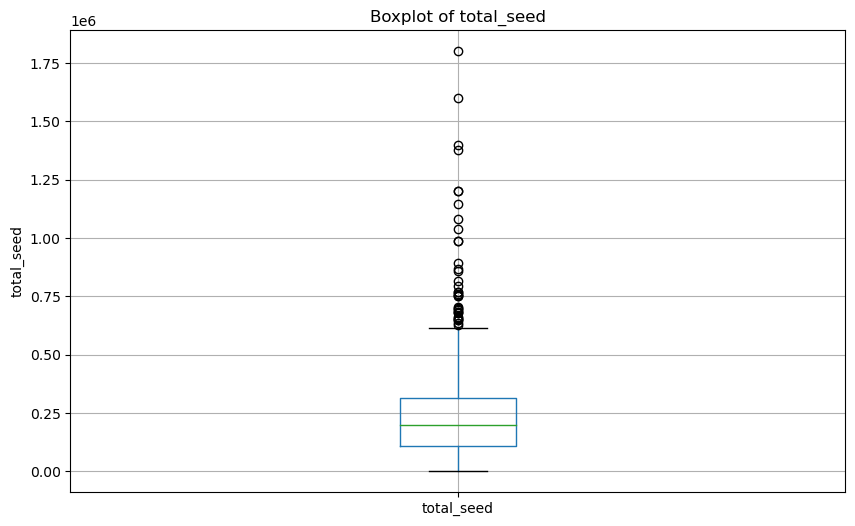

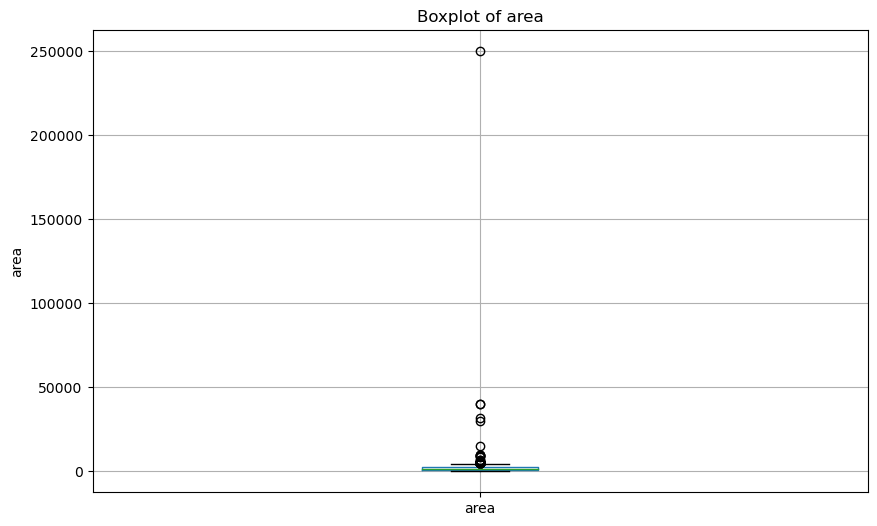

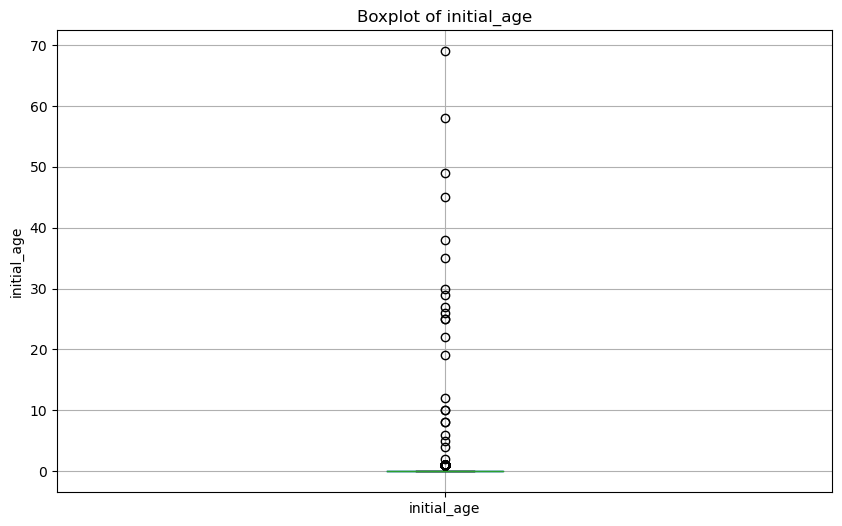

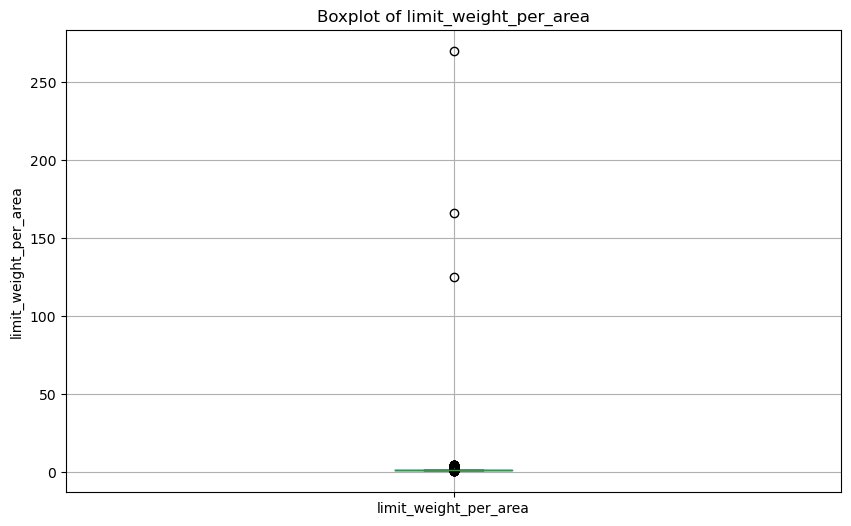

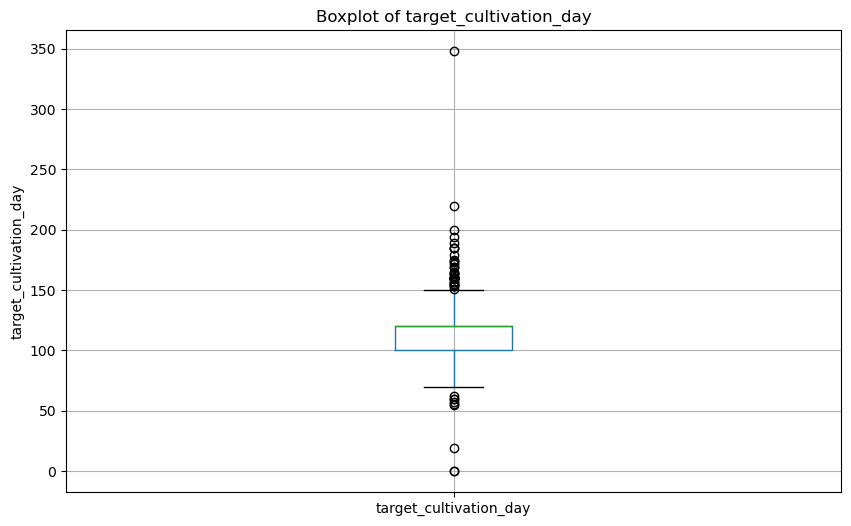

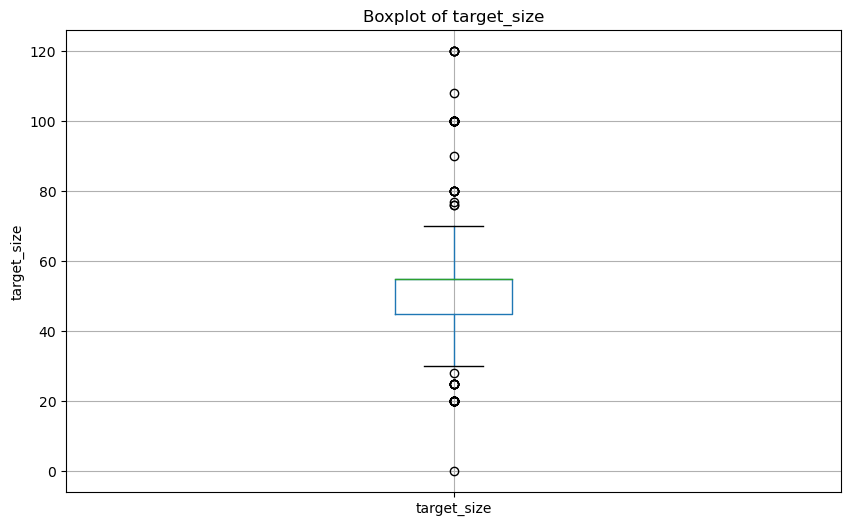

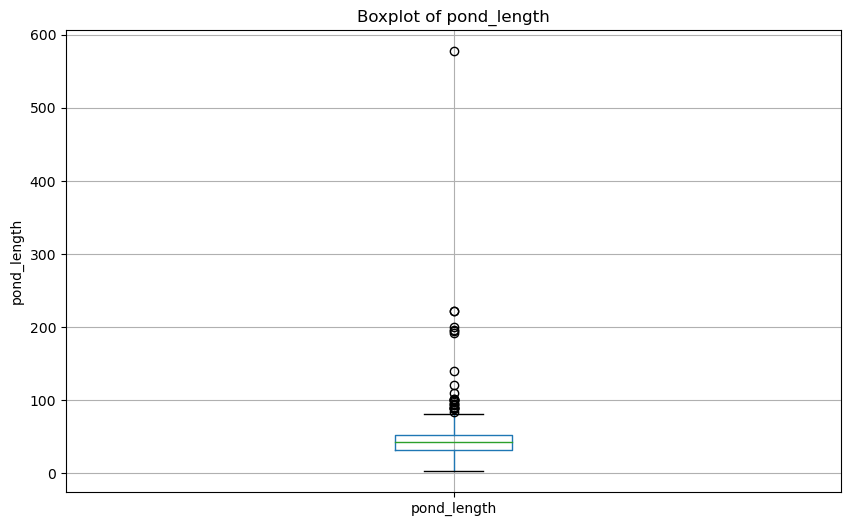

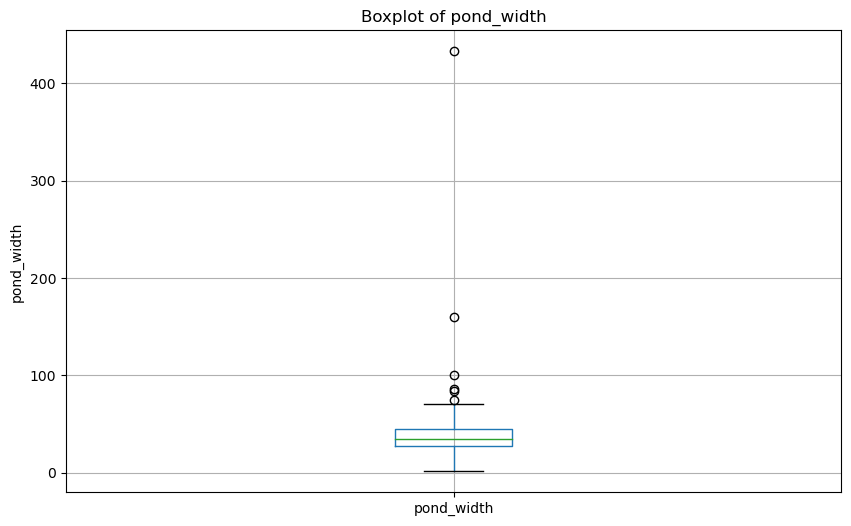

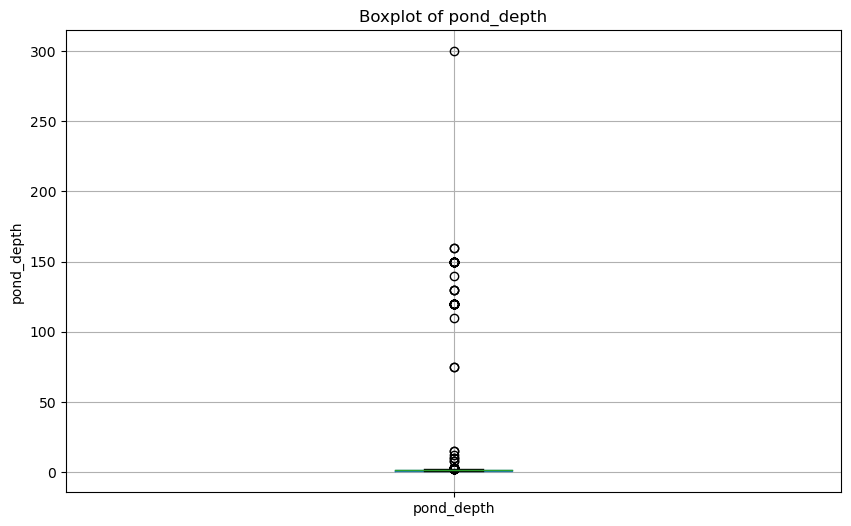

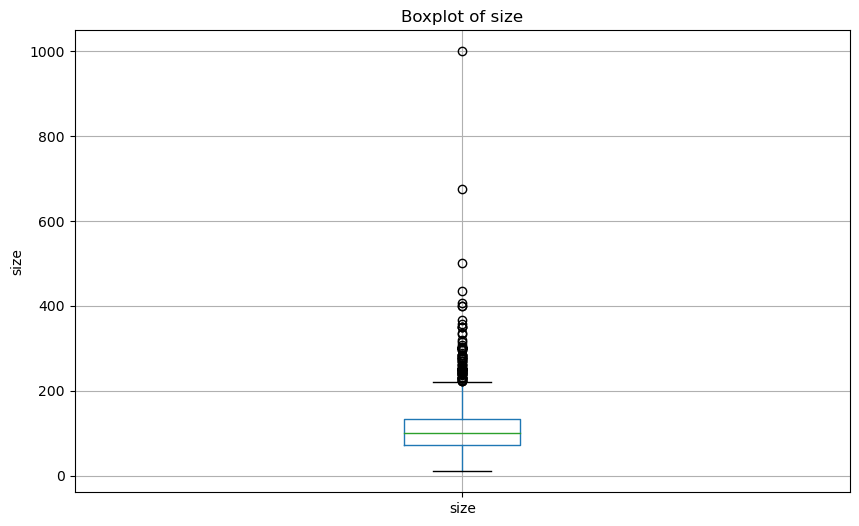

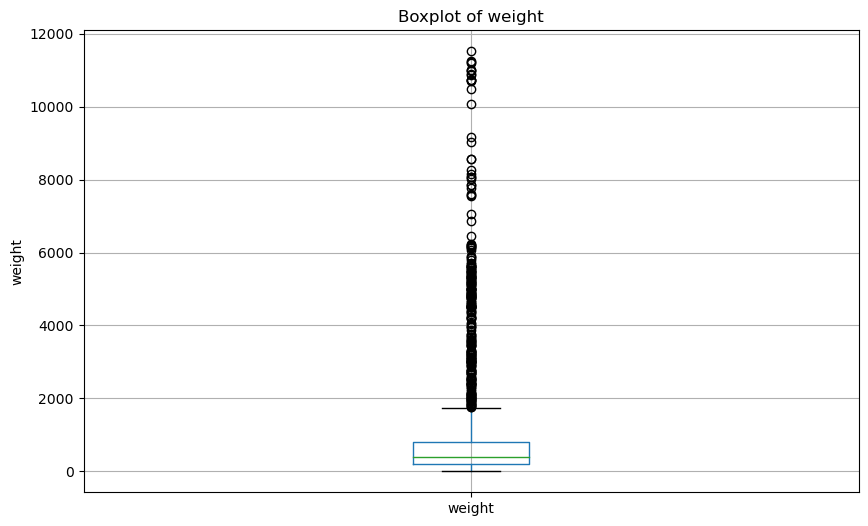

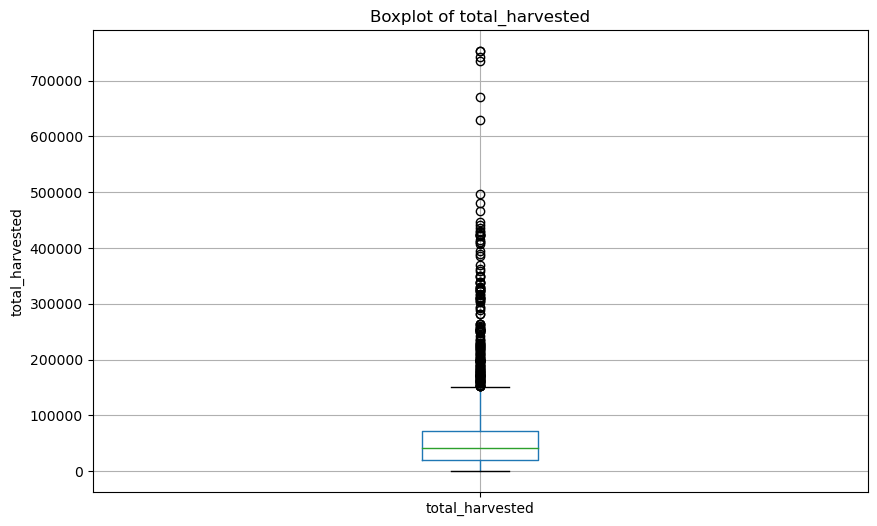

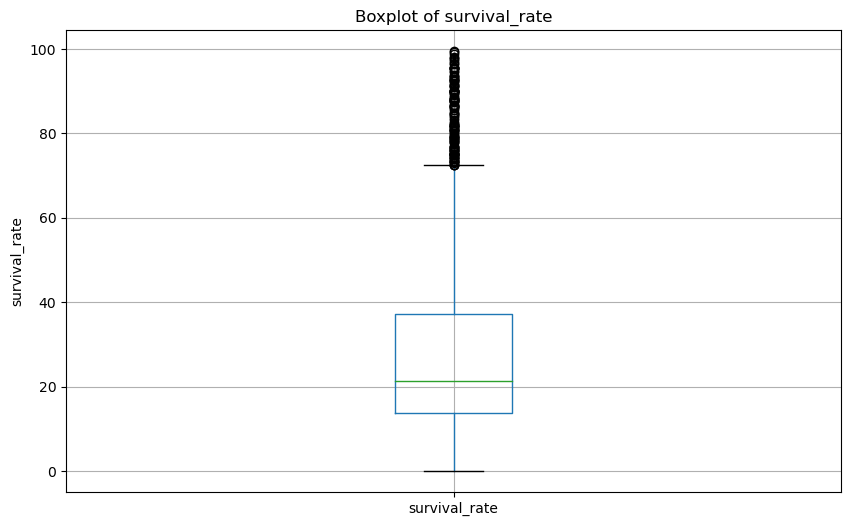

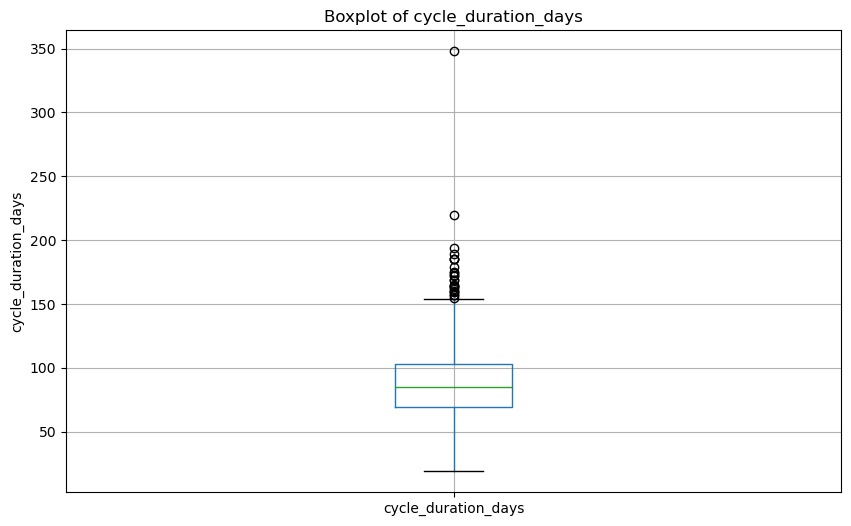

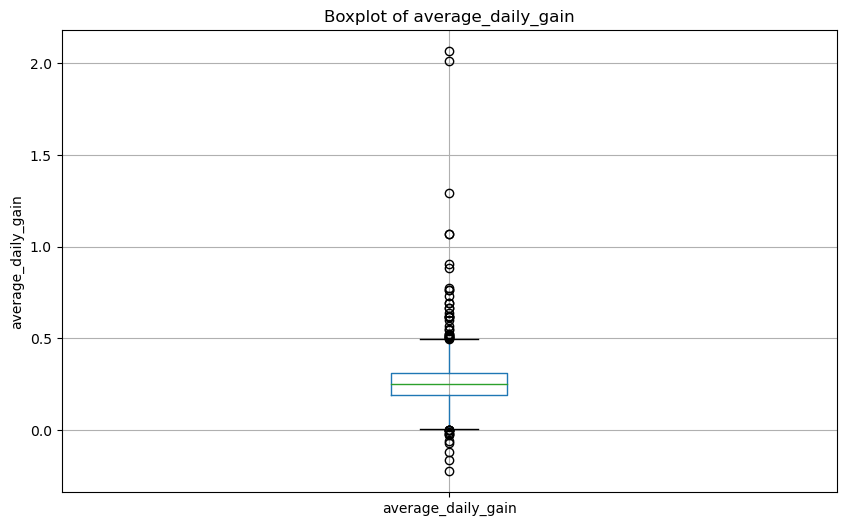

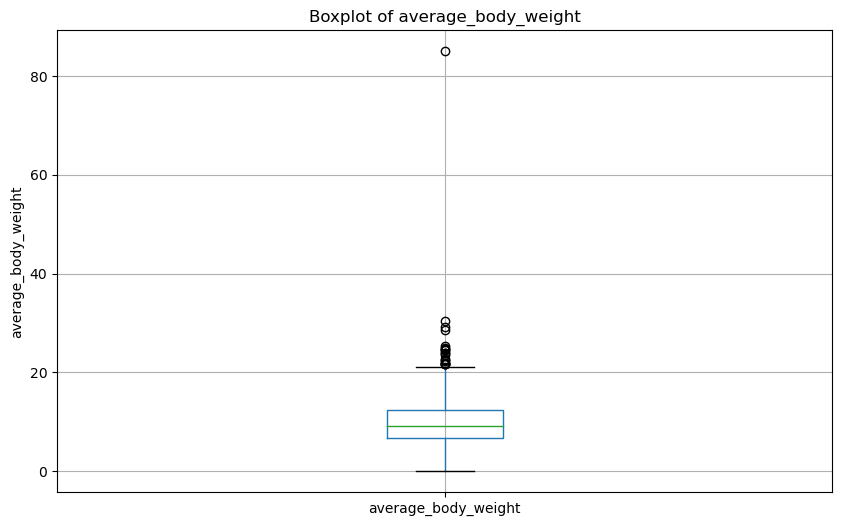

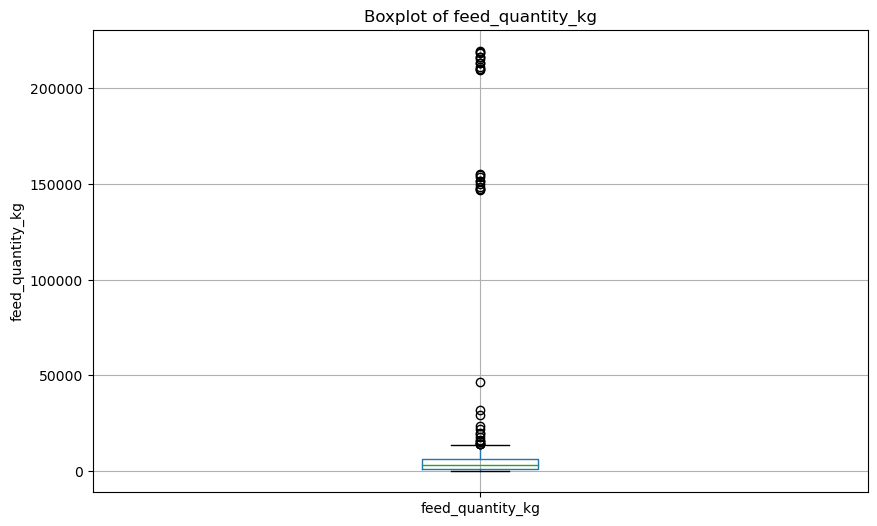

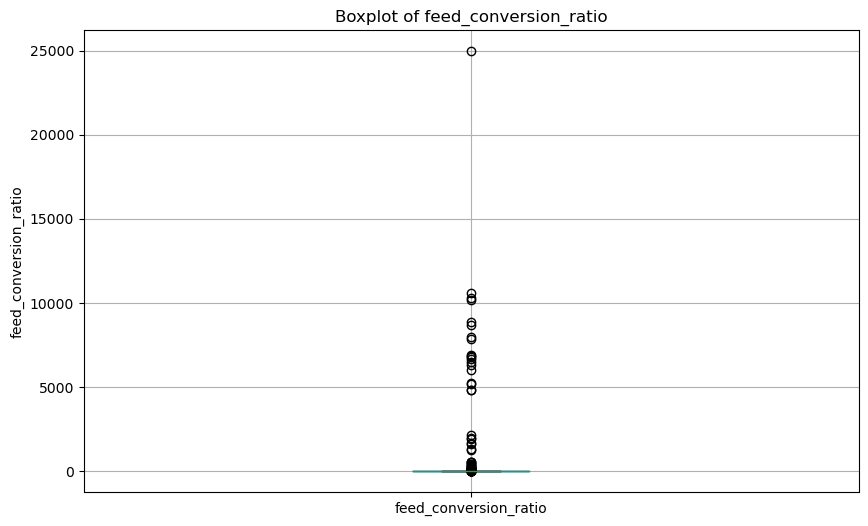

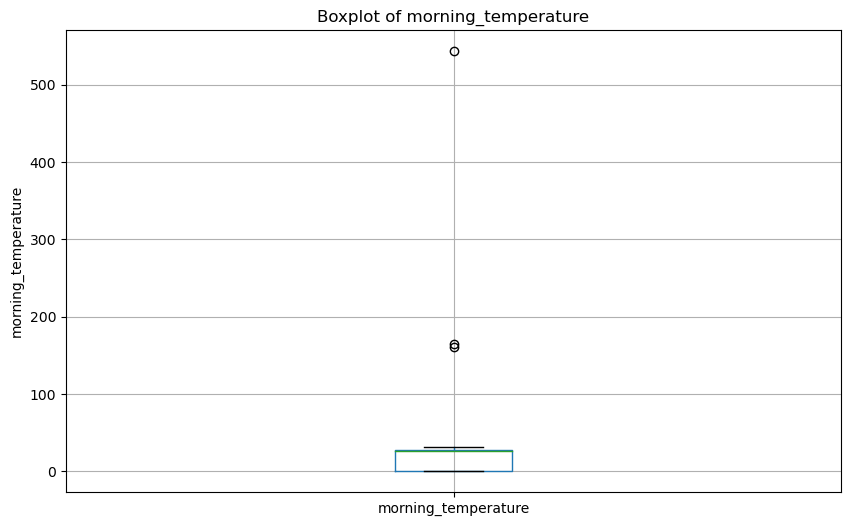

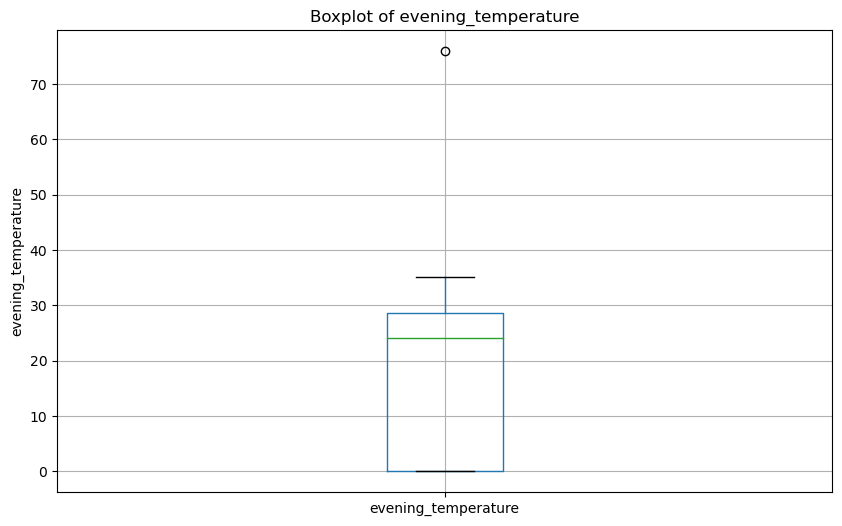

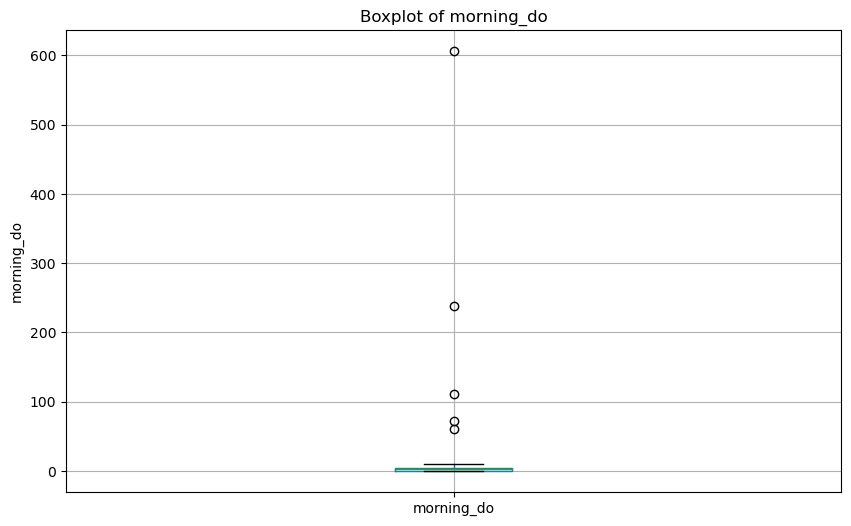

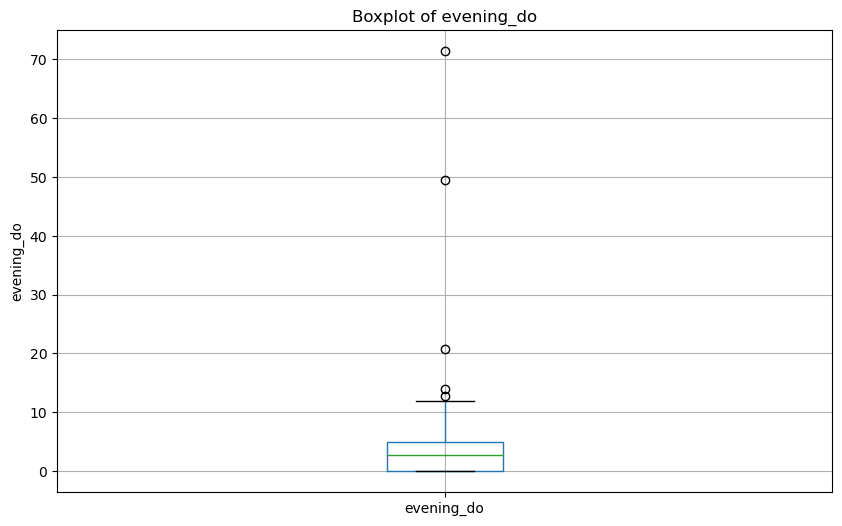

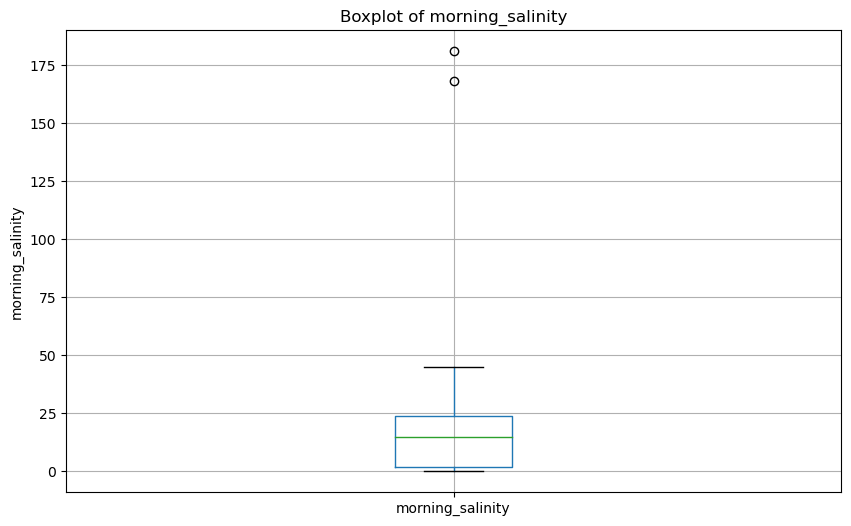

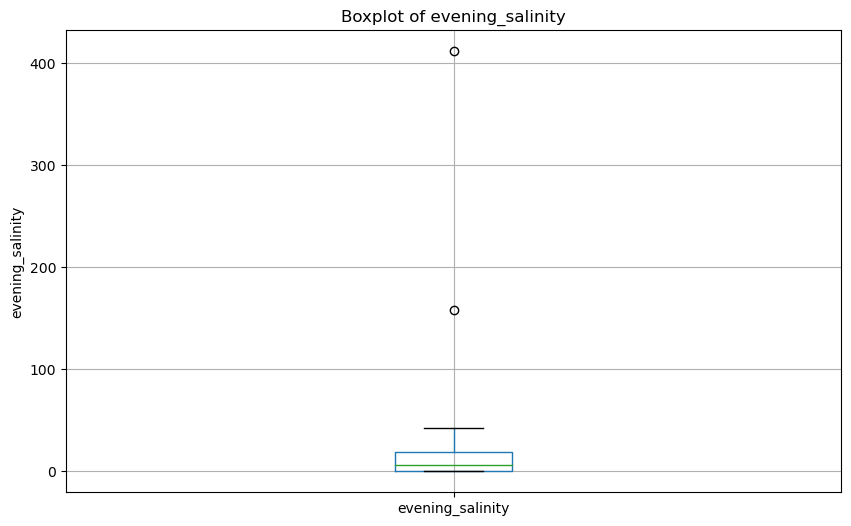

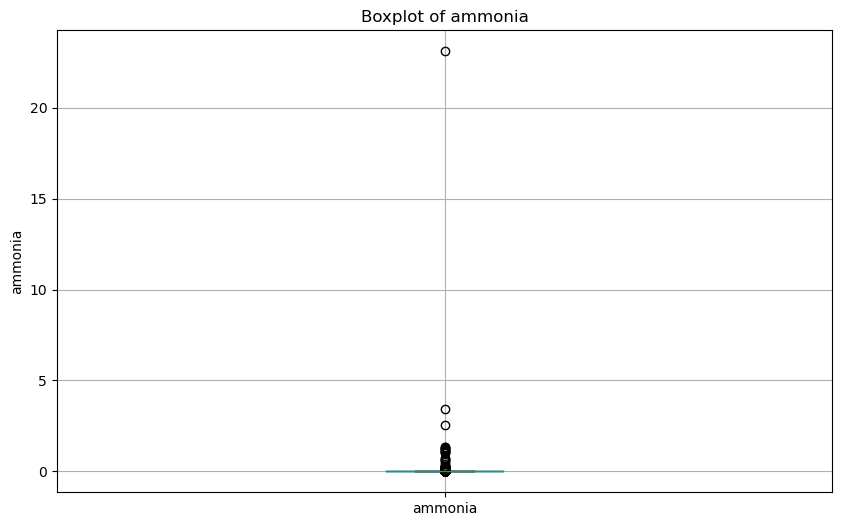

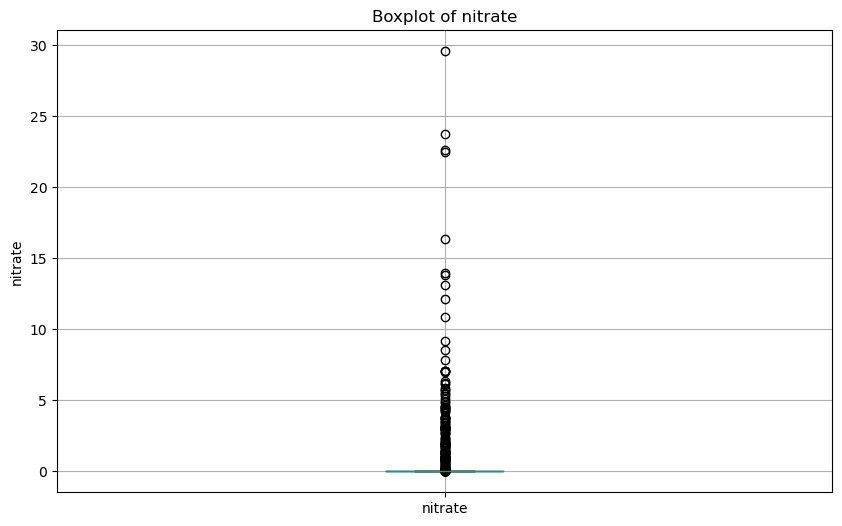

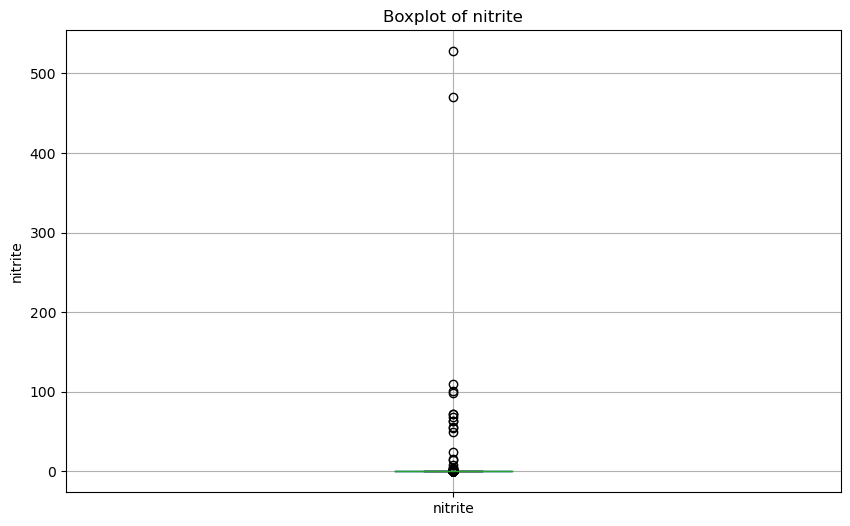

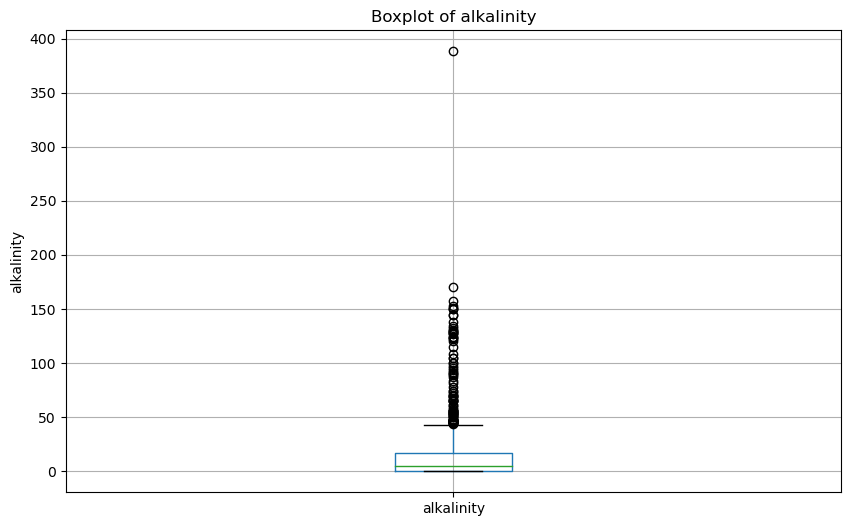

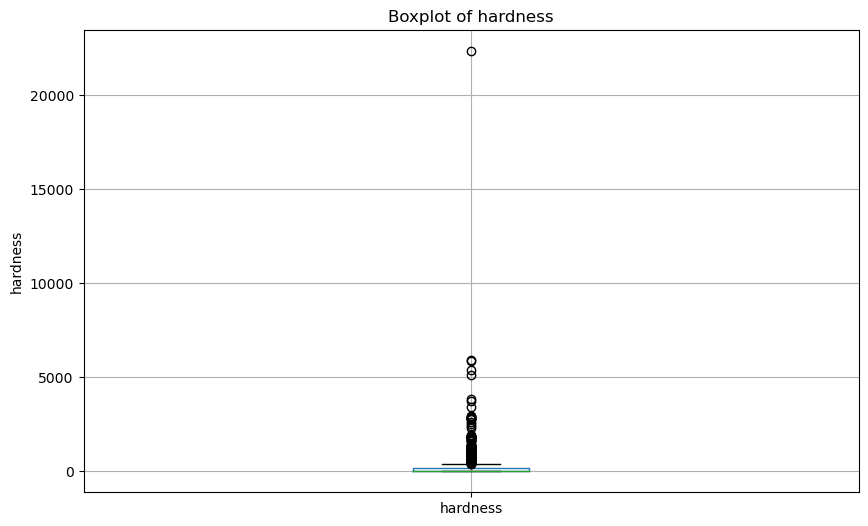

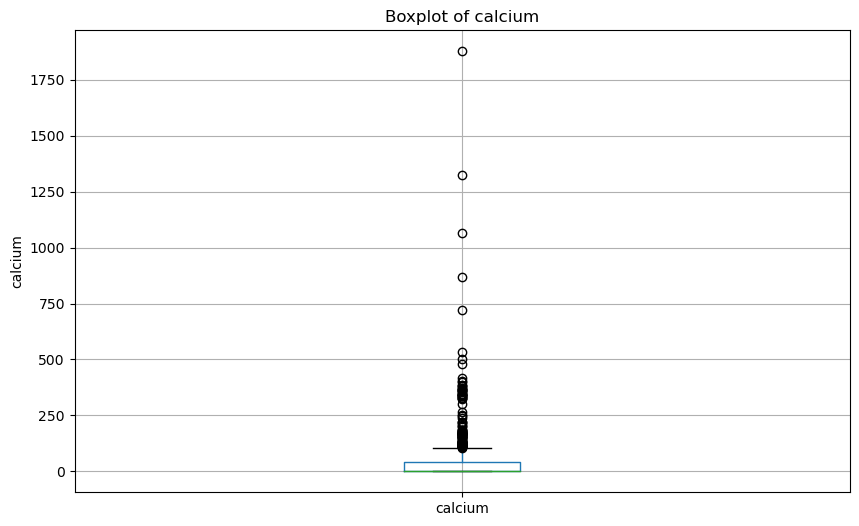

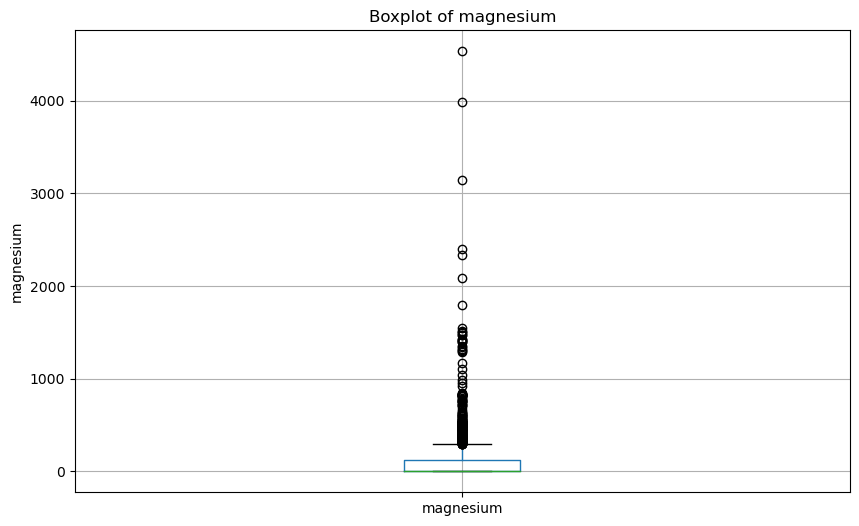

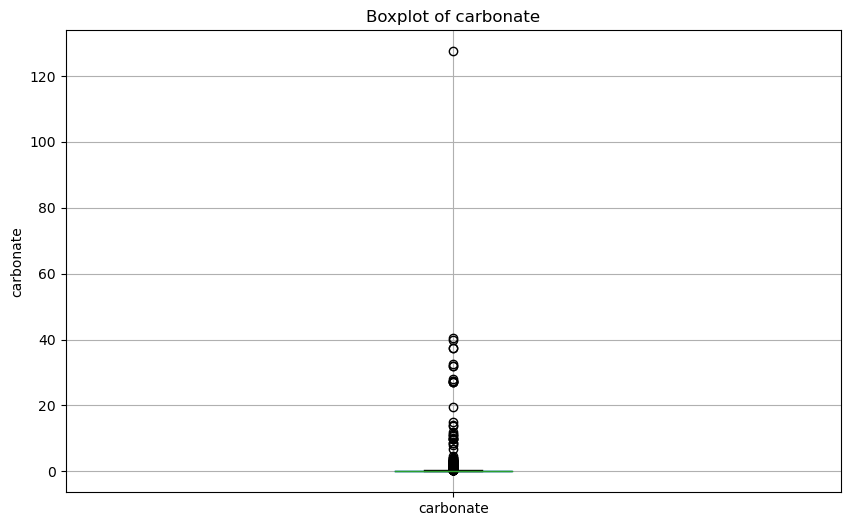

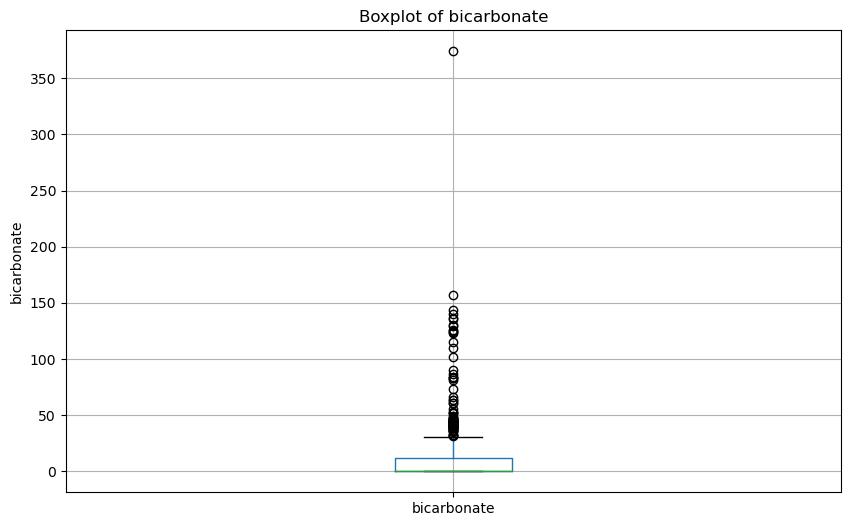

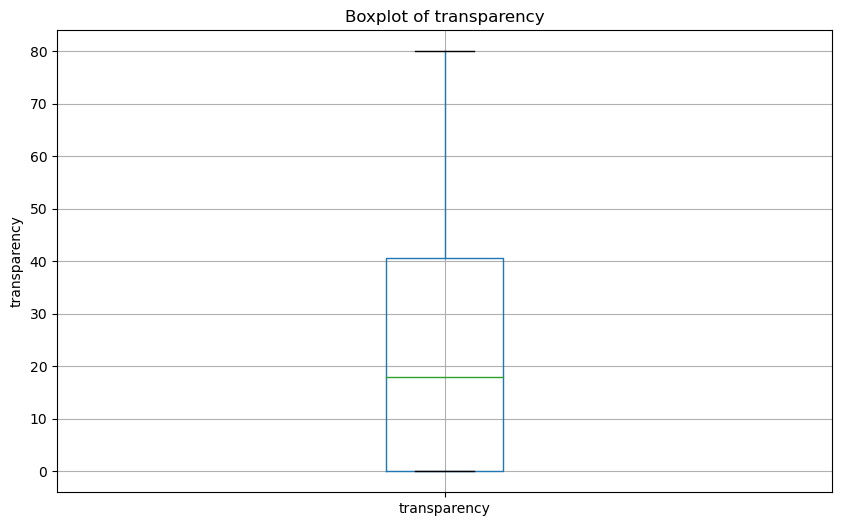

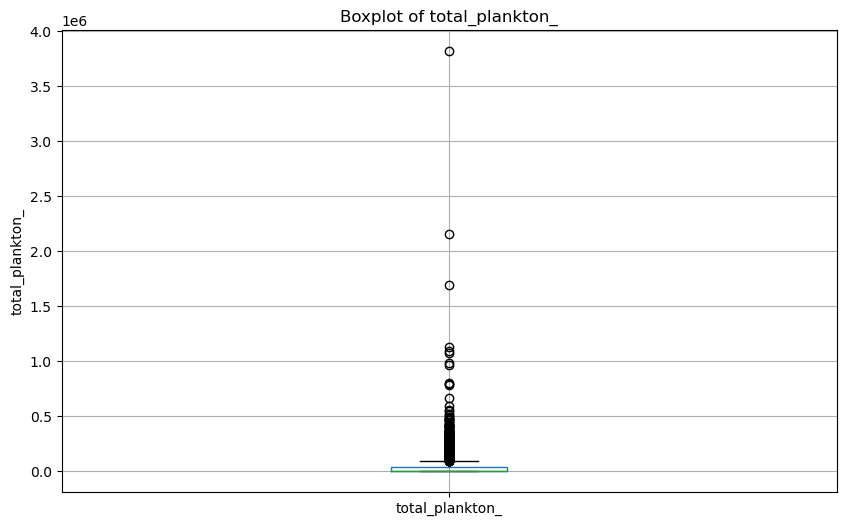

In [323]:
# Membuat boxplot untuk setiap fitur
for feature in features:
    plt.figure(figsize=(10, 6))
    df_clean.boxplot(column=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()

In [324]:
## Check for null values in the dataframe
df_clean.isnull().sum()

total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
cycle_duration_days       0
average_daily_gain        0
average_body_weight       0
feed_quantity_kg          0
feed_conversion_ratio     0
morning_temperature       0
evening_temperature       0
morning_do                0
evening_do                0
morning_salinity          0
evening_salinity          0
ammonia                   0
nitrate                   0
nitrite                   0
alkalinity                0
hardness                  0
calcium                   0
magnesium                 0
carbonate                 0
bicarbonate               0
transparency              0
total_plankton_           0
dtype: int64

In [325]:
df_clean

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667


In [326]:
# save the results to a CSV file
df_clean.to_csv('survival_rate_prediction_data.csv', index=False)

## Average Body Weight

In [327]:
# Display information about the dataframe
df_clean_abw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_seed              1844 non-null   int64  
 1   area                    1844 non-null   float64
 2   initial_age             1844 non-null   float64
 3   limit_weight_per_area   1844 non-null   float64
 4   target_cultivation_day  1844 non-null   float64
 5   target_size             1844 non-null   float64
 6   pond_length             1844 non-null   float64
 7   pond_width              1844 non-null   float64
 8   pond_depth              1844 non-null   float64
 9   total_harvested         1844 non-null   float64
 10  cycle_duration_days     1844 non-null   int64  
 11  average_daily_gain      1844 non-null   float64
 12  average_body_weight     1844 non-null   float64
 13  feed_quantity_kg        1844 non-null   float64
 14  feed_conversion_ratio   1844 non-null   

In [328]:
# Copy DataFrame
df_clean_abw = df_clean.copy()

In [329]:
## Select relevant features for the predictive model
features = [
    'total_seed', 'area', 'initial_age', 'limit_weight_per_area', 'target_cultivation_day',
    'target_size', 'pond_length', 'pond_width', 'pond_depth','total_harvested', 'cycle_duration_days', 
    'average_daily_gain', 'average_body_weight','feed_quantity_kg', 'feed_conversion_ratio', 
    'morning_temperature', 'evening_temperature','morning_do', 'evening_do', 'morning_salinity',
    'evening_salinity', 'ammonia', 'nitrate','nitrite', 'alkalinity', 'hardness', 'calcium', 'magnesium', 'carbonate', 'bicarbonate',
    'transparency', 'total_plankton'
]

## Ensure only columns that exist in 'df_clean_abw' are used
features = [feature for feature in features if feature in df_clean_abw.columns]

In [330]:
## Select columns that match the chosen features
df_clean_abw = df_clean_abw[features]

In [331]:

df_clean_abw

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,total_harvested,...,ammonia,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,144046.5000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,67723.8624,...,0.000000,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,14703.4126,...,0.005370,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,12090.0000,...,0.006827,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,37227.3584,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,22185.0000,...,0.000000,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,95312.0000,...,0.000000,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,36120.0000,...,0.014636,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,11200.0000,...,0.000000,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000


In [332]:
df_clean_abw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_seed              1844 non-null   int64  
 1   area                    1844 non-null   float64
 2   initial_age             1844 non-null   float64
 3   limit_weight_per_area   1844 non-null   float64
 4   target_cultivation_day  1844 non-null   float64
 5   target_size             1844 non-null   float64
 6   pond_length             1844 non-null   float64
 7   pond_width              1844 non-null   float64
 8   pond_depth              1844 non-null   float64
 9   total_harvested         1844 non-null   float64
 10  cycle_duration_days     1844 non-null   int64  
 11  average_daily_gain      1844 non-null   float64
 12  average_body_weight     1844 non-null   float64
 13  feed_quantity_kg        1844 non-null   float64
 14  feed_conversion_ratio   1844 non-null   

In [333]:
# save the results to a CSV file
df_clean_abw.to_csv('abw_prediction_data.csv', index=False)

## Biomass in Kg

In [334]:
# Rename the column "total_harvested" to "biomass"
df_clean_biomass = df_clean.rename(columns={'total_harvested': 'biomass'})

In [335]:
# Sanity Check
df_clean_biomass

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrate,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.011111,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.000000,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.000000,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.000000,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.000000,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.125000,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667


In [336]:
# Display information about the dataframe
df_clean_biomass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_seed              1844 non-null   int64  
 1   area                    1844 non-null   float64
 2   initial_age             1844 non-null   float64
 3   limit_weight_per_area   1844 non-null   float64
 4   target_cultivation_day  1844 non-null   float64
 5   target_size             1844 non-null   float64
 6   pond_length             1844 non-null   float64
 7   pond_width              1844 non-null   float64
 8   pond_depth              1844 non-null   float64
 9   size                    1844 non-null   float64
 10  weight                  1844 non-null   float64
 11  biomass                 1844 non-null   float64
 12  survival_rate           1844 non-null   float64
 13  cycle_duration_days     1844 non-null   int64  
 14  average_daily_gain      1844 non-null   

In [337]:
# save the results to a CSV file
df_clean_biomass.to_csv('biomass_prediction_data.csv', index=False)

## Revenues

In [338]:
# Load the data from CSV files
farms_df = pd.read_csv('Data/farms.csv')
ponds_df = pd.read_csv('Data/ponds.csv')
cycles_df = pd.read_csv('Data/cycles.csv')
feeds_df = pd.read_csv('Data/feeds.csv')
fasting_df = pd.read_csv('Data/fasting.csv')
harvests_df = pd.read_csv('Data/harvests.csv')
sampling_df = pd.read_csv('Data/samplings.csv')
measurements_df = pd.read_csv('Data/measurements.csv')

In [383]:
# Display information about the dataframe
farms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        551 non-null    int64 
 1   province  479 non-null    object
 2   regency   458 non-null    object
 3   timezone  551 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.3+ KB


In [384]:
# Display information about the dataframe
ponds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                338 non-null    int64  
 1   farm_id           338 non-null    int64  
 2   length            315 non-null    float64
 3   width             309 non-null    float64
 4   deep              246 non-null    float64
 5   created_at        338 non-null    object 
 6   updated_at        338 non-null    object 
 7   record_id         338 non-null    object 
 8   extracted_at      338 non-null    object 
 9   max_seed_density  135 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 26.5+ KB


In [385]:
# Display information about the dataframe
cycles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2617 non-null   int64  
 1   pond_id                 2617 non-null   int64  
 2   species_id              1803 non-null   float64
 3   total_seed              2617 non-null   int64  
 4   started_at              2617 non-null   object 
 5   finished_at             2616 non-null   object 
 6   remark                  1336 non-null   object 
 7   created_at              2617 non-null   object 
 8   updated_at              2617 non-null   object 
 9   area                    2617 non-null   float64
 10  initial_age             2569 non-null   float64
 11  limit_weight_per_area   2610 non-null   float64
 12  target_cultivation_day  2614 non-null   float64
 13  target_size             2613 non-null   float64
 14  extracted_at            2617 non-null   

In [386]:
# Display information about the dataframe
feeds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706908 entries, 0 to 706907
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cycle_id   706908 non-null  int64  
 1   logged_at  706887 non-null  object 
 2   quantity   706887 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.2+ MB


In [387]:
# Display information about the dataframe
fasting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6189 entries, 0 to 6188
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   logged_date  6189 non-null   object 
 1   cycle_id     6189 non-null   int64  
 2   fasting      6172 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 145.2+ KB


In [388]:
# Display information about the dataframe
harvests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8087 entries, 0 to 8086
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cycle_id       8087 non-null   float64
 1   updated_at     8087 non-null   object 
 2   size           8087 non-null   float64
 3   created_at     8087 non-null   object 
 4   weight         8087 non-null   float64
 5   id             8087 non-null   float64
 6   harvested_at   8087 non-null   object 
 7   status         7824 non-null   object 
 8   selling_price  8087 non-null   float64
dtypes: float64(5), object(4)
memory usage: 568.7+ KB


In [389]:
# Display information about the dataframe
sampling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15032 entries, 0 to 15031
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_id        15032 non-null  float64
 1   updated_at      15032 non-null  object 
 2   sampled_at      15032 non-null  object 
 3   created_at      15032 non-null  object 
 4   average_weight  15032 non-null  float64
 5   id              15032 non-null  float64
 6   remark          1339 non-null   object 
dtypes: float64(3), object(4)
memory usage: 822.2+ KB


In [390]:
# Display information about the dataframe
measurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139050 entries, 0 to 139049
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   pond_id              139050 non-null  int64  
 1   cycle_id             139050 non-null  int64  
 2   measured_date        139050 non-null  object 
 3   morning_temperature  97195 non-null   float64
 4   evening_temperature  89211 non-null   float64
 5   morning_do           77726 non-null   float64
 6   evening_do           73952 non-null   float64
 7   morning_salinity     92662 non-null   float64
 8   evening_salinity     65093 non-null   float64
 9   morning_pH           118935 non-null  float64
 10  evening_pH           60949 non-null   float64
 11  transparency         77300 non-null   float64
 12  turbidity            166 non-null     float64
 13  ammonia              3748 non-null    float64
 14  nitrate              2162 non-null    float64
 15  nitrite          

In [391]:
harvests_df

,cycle_id,updated_at,size,created_at,weight,id,harvested_at,status,selling_price
0,15013.0,2022-07-18 08:42:59,399.86,2022-07-18 08:42:59,0.01,11960.0,2022-04-17,Failed,0.0
1,11848.0,2021-10-25 23:29:53,300.00,2021-10-24 08:38:53,46.00,7520.0,2021-10-22,Full,1610000.0
2,11848.0,2021-10-25 23:29:35,300.00,2021-10-25 23:29:35,10.00,7546.0,2021-10-21,Partial,350000.0
3,4666.0,2020-10-08 02:07:18,110.00,2020-10-08 02:07:18,270.50,3009.0,2020-08-31,Failed,0.0
4,4666.0,2020-10-08 02:07:37,190.00,2020-10-08 02:07:37,270.50,3010.0,2020-08-31,Failed,0.0
...,...,...,...,...,...,...,...,...,...
8082,28500.0,2024-03-17 06:34:46,90.00,2024-03-14 05:43:03,12.00,27731.0,2024-03-05,Full,720000.0
8083,28500.0,2024-03-17 06:31:41,150.00,2024-03-14 05:47:06,4.00,27732.0,2024-02-02,Partial,280000.0
8084,11741.0,2022-10-06 05:23:38,80.00,2021-11-22 05:44:13,183.00,8252.0,2021-11-20,Full,10431000.0
8085,11741.0,2022-10-06 05:23:39,80.00,2021-11-22 05:55:49,30.00,8254.0,2021-11-20,Partial,1200000.0


In [392]:
# Fill missing values with 0 in the selling_price column
harvests_df['selling_price'].fillna(0, inplace=True)

# Merge data based on cycle_id and calculate the average selling_price per cycle
df_harvest_grouped = harvests_df.groupby('cycle_id')['selling_price'].mean().reset_index()

In [393]:
df_harvest_grouped

,cycle_id,selling_price
0,3458.0,0.0
1,3459.0,0.0
2,4036.0,0.0
3,4038.0,73445092.5
4,4039.0,37794397.6
...,...,...
2485,29619.0,19062500.0
2486,29659.0,2100000.0
2487,29679.0,0.0
2488,29873.0,57401400.0


In [394]:
# Merge df_harvest_grouped with other features
df_selling_price = pd.merge(df_clean_measurement, df_harvest_grouped, on='cycle_id', how='inner')
df_selling_price

,cycle_id,pond_id,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_name,pond_length,...,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,feed_remaining_percent,quantity,average_weight,selling_price
0,18876,36294,331920,4030.00,0.0,2.00,110.0,35.0,H,65.00,...,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,15.902174,33957.0,4.908235,4.984335e+07
1,24088,39154,357570,2000.00,0.0,1.25,120.0,20.0,A3,50.00,...,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,0.000000,23355.0,10.341667,2.740664e+07
2,17743,20914,168275,1512.00,0.0,1.25,100.0,55.0,B4,54.00,...,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781,5.387755,11766.0,10.927273,0.000000e+00
3,17125,34187,188000,1225.00,0.0,1.25,100.0,55.0,A,35.00,...,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,66.000000,54.0,1.670000,7.464000e+06
4,28070,46261,200128,803.84,0.0,1.25,120.0,55.0,B8,32.00,...,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,NaN,NaN,NaN,2.692924e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,24771,42826,226284,1400.00,0.0,1.25,120.0,55.0,A1,40.00,...,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,13.200000,24362.0,7.236667,1.899866e+07
1840,19131,34712,300000,4999.90,0.0,1.25,88.0,55.0,E01,70.71,...,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034,NaN,NaN,NaN,0.000000e+00
1841,27552,45697,100000,900.00,0.0,1.25,120.0,55.0,Kolam 4,45.00,...,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,2.974249,1800.0,2.318182,1.345713e+07
1842,27885,24570,30716,86.00,0.0,1.25,120.0,20.0,Bagus,10.71,...,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667,NaN,NaN,NaN,0.000000e+00


In [395]:
df_selling_price.columns

Index(['cycle_id', 'pond_id', 'total_seed', 'area', 'initial_age',
       'limit_weight_per_area', 'target_cultivation_day', 'target_size',
       'pond_name', 'pond_length', 'pond_width', 'pond_depth', 'size',
       'weight', 'total_harvested', 'survival_rate', 'cycle_duration_days',
       'average_daily_gain', 'average_body_weight', 'feed_quantity_kg',
       'feed_conversion_ratio', 'morning_temperature', 'evening_temperature',
       'morning_do', 'evening_do', 'morning_salinity', 'evening_salinity',
       'ammonia', 'nitrate', 'nitrite', 'alkalinity', 'hardness', 'calcium',
       'magnesium', 'carbonate', 'bicarbonate', 'transparency',
       'total_plankton_', 'feed_remaining_percent', 'quantity',
       'average_weight', 'selling_price'],
      dtype='object')

In [396]:
df_selling_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1844 entries, 0 to 1843
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cycle_id                1844 non-null   int64  
 1   pond_id                 1844 non-null   int64  
 2   total_seed              1844 non-null   int64  
 3   area                    1844 non-null   float64
 4   initial_age             1844 non-null   float64
 5   limit_weight_per_area   1844 non-null   float64
 6   target_cultivation_day  1844 non-null   float64
 7   target_size             1844 non-null   float64
 8   pond_name               1844 non-null   object 
 9   pond_length             1844 non-null   float64
 10  pond_width              1844 non-null   float64
 11  pond_depth              1844 non-null   float64
 12  size                    1844 non-null   float64
 13  weight                  1844 non-null   float64
 14  total_harvested         1844 non-null   

In [397]:
# Selecting relevant features
features = [
    'total_seed',
    'area',
    'initial_age',
    'limit_weight_per_area',
    'target_cultivation_day',
    'target_size',
    'pond_length',
    'pond_width',
    'pond_depth',
    'size',
    'weight',
    'total_harvested',
    'survival_rate',
    'cycle_duration_days',
    'average_daily_gain',
    'average_body_weight',
    'feed_quantity_kg',
    'feed_conversion_ratio',
    'morning_temperature',
    'evening_temperature',
    'morning_do',
    'evening_do',
    'morning_salinity',
    'evening_salinity',
    'ammonia',
    'nitrate',
    'nitrite',
    'alkalinity',
    'hardness',
    'calcium',
    'magnesium',
    'carbonate',
    'bicarbonate',
    'transparency',
    'total_plankton_',
    'selling_price'
]



In [398]:
df_selling_price = df_selling_price[features]

In [399]:
df_selling_price

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,selling_price
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,4.984335e+07
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,2.740664e+07
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781,0.000000e+00
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,7.464000e+06
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,2.692924e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,1.899866e+07
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034,0.000000e+00
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,1.345713e+07
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667,0.000000e+00


In [400]:
## Check for null values in the dataframe
df_selling_price.isnull().sum()

total_seed                0
area                      0
initial_age               0
limit_weight_per_area     0
target_cultivation_day    0
target_size               0
pond_length               0
pond_width                0
pond_depth                0
size                      0
weight                    0
total_harvested           0
survival_rate             0
cycle_duration_days       0
average_daily_gain        0
average_body_weight       0
feed_quantity_kg          0
feed_conversion_ratio     0
morning_temperature       0
evening_temperature       0
morning_do                0
evening_do                0
morning_salinity          0
evening_salinity          0
ammonia                   0
nitrate                   0
nitrite                   0
alkalinity                0
hardness                  0
calcium                   0
magnesium                 0
carbonate                 0
bicarbonate               0
transparency              0
total_plankton_           0
selling_price       

In [401]:
df_selling_price

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,selling_price
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,4.984335e+07
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,2.740664e+07
2,168275,1512.00,0.0,1.25,100.0,55.0,54.00,28.00,1.5,105.94,...,0.030822,17.671233,126.602740,50.753425,140.136986,0.821918,16.849315,45.205479,66952.191781,0.000000e+00
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,7.464000e+06
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,2.692924e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,1.899866e+07
1840,300000,4999.90,0.0,1.25,88.0,55.0,70.71,70.71,1.5,18.40,...,0.097528,23.820225,0.000000,0.000000,0.000000,0.000000,0.000000,41.853933,46118.573034,0.000000e+00
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,1.345713e+07
1842,30716,86.00,0.0,1.25,120.0,20.0,10.71,8.03,1.0,280.00,...,0.000208,5.416667,0.000000,3.437500,9.479167,1.166667,9.208333,0.000000,5416.666667,0.000000e+00


In [403]:
# Drop rows where selling_price is 0
df_selling_price = df_selling_price[df_selling_price['selling_price'] != 0]
df_selling_price

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,selling_price
0,331920,4030.00,0.0,2.00,110.0,35.0,65.00,62.00,1.0,83.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.327103,0.000000,4.984335e+07
1,357570,2000.00,0.0,1.25,120.0,20.0,50.00,40.00,1.4,72.48,...,0.008200,17.044444,680.555556,119.855556,575.700000,0.000000,15.777778,68.916667,212305.555556,2.740664e+07
3,188000,1225.00,0.0,1.25,100.0,55.0,35.00,35.00,1.2,93.00,...,0.044667,9.813333,176.000000,29.333333,146.666667,0.160000,9.733333,0.000000,22466.666667,7.464000e+06
4,200128,803.84,0.0,1.25,120.0,55.0,32.00,32.00,1.5,89.24,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.421569,0.000000,2.692924e+07
5,148007,1254.00,0.0,1.25,153.0,55.0,34.64,34.65,1.3,60.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.845833,0.000000,4.912083e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,122400,500.00,0.0,1.25,100.0,30.0,25.00,20.00,1.5,125.00,...,0.005179,3.357143,0.000000,2.857143,1.785714,0.500000,2.857143,0.000000,16250.000000,1.183333e+04
1838,221000,314.00,0.0,4.77,110.0,50.0,20.00,20.00,1.2,127.00,...,0.026263,16.323232,73.606061,29.939394,80.262626,0.909091,0.404040,33.838384,4909.595960,3.153902e+06
1839,226284,1400.00,0.0,1.25,120.0,55.0,40.00,35.00,1.2,87.00,...,0.000000,13.072165,0.000000,0.000000,0.000000,0.000000,6.845361,58.314433,44536.082474,1.899866e+07
1841,100000,900.00,0.0,1.25,120.0,55.0,45.00,20.00,1.5,120.00,...,0.004145,22.309091,771.454545,95.890909,300.436364,0.436364,16.418182,0.000000,49785.490909,1.345713e+07


In [404]:
df_selling_price[df_selling_price['selling_price'] == 0]

,total_seed,area,initial_age,limit_weight_per_area,target_cultivation_day,target_size,pond_length,pond_width,pond_depth,size,...,nitrite,alkalinity,hardness,calcium,magnesium,carbonate,bicarbonate,transparency,total_plankton_,selling_price


In [405]:
# save the results to a CSV file
df_selling_price.to_csv('df_selling_price_prediction_data.csv', index=False)